# Final Project Submission

Please fill out:
* Student name: Michael Flores
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni 
* Blog post URL: https://medium.com/@msf894/flatiron-school-project-2-king-county-housing-dataset-d123dc9b6b3f

# Initial Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
%matplotlib inline

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Column Names and Descriptions

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

# Data Cleaning and Exploration

## Checking and filling in null values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
# Checking for columns with null or missing values first
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
data['waterfront'].value_counts(normalize = True,dropna = False)

0.0    0.883225
NaN    0.110015
1.0    0.006760
Name: waterfront, dtype: float64

The high percentage of non-waterfront properties indicates that replacing nulls with 0 is viable.

In [7]:
data['view'].value_counts(normalize = True,dropna = False)

0.0    0.899292
2.0    0.044312
3.0    0.023522
1.0    0.015280
4.0    0.014678
NaN    0.002917
Name: view, dtype: float64

Most properties have not been viewed at all indicating that replacing with 0 is viable. View appears as if it can be converted to a binary variable.

In [8]:
data['yr_renovated'].value_counts(normalize = True, dropna = False)

0.0       0.787656
NaN       0.177895
2014.0    0.003380
2003.0    0.001435
2013.0    0.001435
            ...   
1944.0    0.000046
1948.0    0.000046
1976.0    0.000046
1934.0    0.000046
1953.0    0.000046
Name: yr_renovated, Length: 71, dtype: float64

High percentage of homes not being renovated at all. It appears as if it can be converted to a binary variable.

In [9]:
data2 = data
data2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [10]:
# Filling in null values for waterfront with 0

data2['waterfront'] = data2['waterfront'].fillna(0)

In [11]:
# Confirming changes
data2['waterfront'] = data2['waterfront'].astype('int64')
data2['waterfront'].value_counts(normalize = True)

0    0.99324
1    0.00676
Name: waterfront, dtype: float64

In [12]:
# Filling in null values for view with 0

data2['view'] = data2['view'].fillna(0)

In [13]:
# Confirming changes

data2['view'] = data2['view'].astype('int64')
data2['view'].value_counts(normalize = True)

0    0.902209
2    0.044312
3    0.023522
1    0.015280
4    0.014678
Name: view, dtype: float64

In [14]:
data2['yr_renovated'] = data2['yr_renovated'].fillna(0)

In [15]:
data2['yr_renovated'] = data2['yr_renovated'].astype('int64')
data2['yr_renovated'].value_counts(normalize = True)

0       0.965551
2014    0.003380
2003    0.001435
2013    0.001435
2007    0.001389
          ...   
1976    0.000046
1953    0.000046
1951    0.000046
1946    0.000046
1944    0.000046
Name: yr_renovated, Length: 70, dtype: float64

In [16]:
# Confirming all null columns have been handled
data2.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Dealing with duplicates

In [18]:
#Checking for duplicated rows that may be in the dataset
duplicated_rows = data2[data2.duplicated()]
duplicated_rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


No duplicated rows found.

In [19]:
for col in data2.columns:
    print(data2[col].value_counts())

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64
6/23/2014     142
6/25/2014     131
6/26/2014     131
7/8/2014      127
4/27/2015     126
             ... 
8/30/2014       1
1/31/2015       1
11/30/2014      1
2/15/2015       1
8/3/2014        1
Name: date, Length: 372, dtype: int64
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25

Looking at the value counts for ids reveals that are multiples of the same id in this dataset. This is most likely due to the same house being resold multiple times over the year span.

I also noted that there is a '?' value for sqft_basement column which I will address later on.

In [20]:
# Checking to see number of duplicated ids
data3 = data2
duplicate_ids = data3[data3.duplicated(['id'])]
duplicate_ids

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290.0,1939,0,98117,47.6870,-122.386,1570,4500
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600.0,1997,0,98006,47.5503,-122.102,3860,11244
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280.0,1922,1984,98146,47.4957,-122.352,1820,7460
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,0,0,...,6,1000,0.0,1943,0,98178,47.4897,-122.240,1020,7138
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,0,0,...,7,1100,1080.0,1954,0,98133,47.7711,-122.341,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,2/19/2015,645000.0,4,3.50,2910,5260,2.0,0,0,...,9,2910,0.0,2012,0,98065,47.5168,-121.883,2910,5260
20597,2724049222,12/1/2014,220000.0,2,2.50,1000,1092,2.0,0,0,...,7,990,10.0,2004,0,98118,47.5419,-122.271,1330,1466
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,0,0,...,8,2680,0.0,2013,0,98045,47.4759,-121.734,2680,5992
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0.0,1933,0,98133,47.7076,-122.342,1130,1598


In [21]:
# Checking to see all unique and duplicated rows

duplicate_ids = data3[data3.duplicated(['id'], keep = False)]
duplicate_ids

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290.0,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290.0,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600.0,1997,0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600.0,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280.0,1922,1984,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,0,0,...,8,2680,0.0,2013,0,98045,47.4759,-121.734,2680,5992
20763,6300000226,6/26/2014,240000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0.0,1933,0,98133,47.7076,-122.342,1130,1598
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0.0,1933,0,98133,47.7076,-122.342,1130,1598
21564,7853420110,10/3/2014,594866.0,3,3.00,2780,6000,2.0,0,0,...,9,2780,0.0,2013,0,98065,47.5184,-121.886,2850,6000


It appears that sequential rows are for any unique house and its duplicates. For example, row 93 and 94 correspond to the same house. The last row for a house contains the most recent house sale data which is what I'll use. I will then remove all other duplicated rows.

In [22]:
# Removing and confirming deletion of duplicated rows
data4 = data3
data4.drop_duplicates(subset='id', keep = 'last', inplace= True)
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     21420 non-null  int64  
 9   view           21420 non-null  int64  
 10  condition      21420 non-null  int64  
 11  grade          21420 non-null  int64  
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  object 
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   21420 non-null  int64  
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

## Handling incorrect values

Now I wanted to handle the '?' value we discovered in sqft_basement. My initial thought was that this represented a placeholder value so I took a closer look at what were the prevalent values for the houses.

In [23]:
print(data4['sqft_basement'].value_counts(normalize = True))

0.0       0.593651
?         0.021102
600.0     0.010084
500.0     0.009617
700.0     0.009617
            ...   
1852.0    0.000047
915.0     0.000047
2350.0    0.000047
1248.0    0.000047
556.0     0.000047
Name: sqft_basement, Length: 304, dtype: float64


In [24]:
basement = data4[data4.sqft_basement != '?']
basement['sqft_basement'] = basement['sqft_basement'].astype('float64')
basement

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0.0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0.0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0.0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0.0,2004,0,98027,47.5345,-122.069,1410,1287


Looking at the houses that do have information on basement square footage, I noticed that sqft_basement is the result of sqft_living minus sqft_above. I could use this to help calculate the missing values for the basement column

In [25]:
# Looking at only the houses with misssing basement values
basement_missing = data4[data4.sqft_basement == '?']
basement_missing

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,?,1995,0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0,0,...,7,1200,?,1921,0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0,0,...,9,3595,?,2014,0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0,0,...,10,3450,?,2002,0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0,0,...,7,1160,?,1980,0,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,0,0,...,7,1390,?,2008,0,98103,47.6931,-122.330,2180,5009
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,0,0,...,7,2330,?,2013,0,98042,47.3590,-122.081,2300,3836
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,0,0,...,8,980,?,2008,0,98117,47.6844,-122.387,980,1023
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,0,0,...,7,2380,?,2010,0,98023,47.2815,-122.356,2380,5396


In [26]:
basement_missing['sqft_basement'] = basement_missing['sqft_living'] - basement_missing['sqft_above']
basement_missing

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0,0,...,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0,0,...,9,3595,0,2014,0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0,0,...,10,3450,0,2002,0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0,0,...,7,1160,380,1980,0,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,0,0,...,7,1390,970,2008,0,98103,47.6931,-122.330,2180,5009
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,0,0,...,7,2330,0,2013,0,98042,47.3590,-122.081,2300,3836
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,0,0,...,8,980,0,2008,0,98117,47.6844,-122.387,980,1023
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,0,0,...,7,2380,0,2010,0,98023,47.2815,-122.356,2380,5396


In [27]:
basement_missing['sqft_basement'].astype('float64')

6          0.0
18         0.0
42         0.0
79         0.0
112      380.0
         ...  
21442    970.0
21447      0.0
21473      0.0
21519      0.0
21581      0.0
Name: sqft_basement, Length: 452, dtype: float64

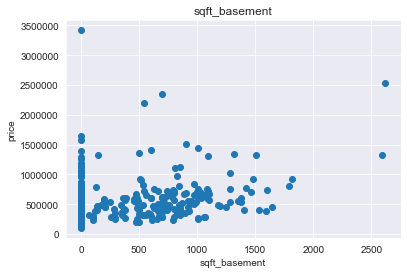

In [28]:
# Confirming that changes to basement column doesn't yield invalid values such
# as negatives
plt.scatter(basement_missing['sqft_basement'], basement_missing.price)
plt.xlabel('sqft_basement')
plt.ylabel('price')
plt.title('sqft_basement')
plt.show()

In [29]:
# Changing the basement column for the dataset
data5 = data4
data5['sqft_basement'] = data5['sqft_living'] - data5['sqft_above']
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     21420 non-null  int64  
 9   view           21420 non-null  int64  
 10  condition      21420 non-null  int64  
 11  grade          21420 non-null  int64  
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  int64  
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   21420 non-null  int64  
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

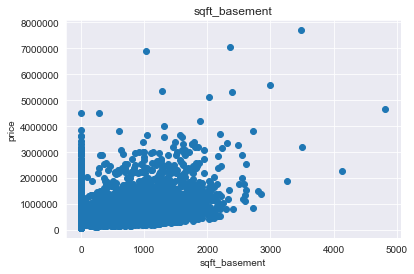

In [30]:
plt.scatter(data5['sqft_basement'], data5.price)
plt.xlabel('sqft_basement')
plt.ylabel('price')
plt.title('sqft_basement')
plt.show()

## Dealing with outliers and data types

In [31]:
data5.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.418614e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,0.233987,3.410784,7.662792,1791.170215,291.962418,1971.092997,68.956723,98077.87437,47.560197,-122.213784,1988.384080,12775.718161
std,2.876761e+09,3.675569e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.082280,0.765437,0.650035,1.171971,828.692965,442.875502,29.387141,364.552298,53.47748,0.138589,0.140791,685.537057,27345.621867
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000
25%,2.123537e+09,3.249500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,4.505500e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000


Looking at the min and max values for each column, I noticed that one house was listed as 33 houses and decided to examine it further.

In [32]:
data5.loc[data5['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


Looking at the square footage of the home leads me to believe that this was a typo and was meant to be 3 instead of 33. Changing the bedroom column will allow me to correct it.

In [33]:
data5.loc[data5['bedrooms'] == 33,'bedrooms'] = 3

In [34]:
# Confirming changes were made
data5.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.418614e+05,3.372549,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,0.233987,3.410784,7.662792,1791.170215,291.962418,1971.092997,68.956723,98077.87437,47.560197,-122.213784,1988.384080,12775.718161
std,2.876761e+09,3.675569e+05,0.902995,0.768720,918.808412,4.153080e+04,0.540081,0.082280,0.765437,0.650035,1.171971,828.692965,442.875502,29.387141,364.552298,53.47748,0.138589,0.140791,685.537057,27345.621867
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000
25%,2.123537e+09,3.249500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,4.505500e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000


In [35]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     21420 non-null  int64  
 9   view           21420 non-null  int64  
 10  condition      21420 non-null  int64  
 11  grade          21420 non-null  int64  
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  int64  
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   21420 non-null  int64  
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

The next variable type I will deal with is date due to the fact that it is a string type. I will first convert it to datetime.

### Changing date column 

In [36]:
# Changing date to date time and confirming changes
data5['date'] = pd.to_datetime(data5['date'])
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21420 non-null  int64         
 1   date           21420 non-null  datetime64[ns]
 2   price          21420 non-null  float64       
 3   bedrooms       21420 non-null  int64         
 4   bathrooms      21420 non-null  float64       
 5   sqft_living    21420 non-null  int64         
 6   sqft_lot       21420 non-null  int64         
 7   floors         21420 non-null  float64       
 8   waterfront     21420 non-null  int64         
 9   view           21420 non-null  int64         
 10  condition      21420 non-null  int64         
 11  grade          21420 non-null  int64         
 12  sqft_above     21420 non-null  int64         
 13  sqft_basement  21420 non-null  int64         
 14  yr_built       21420 non-null  int64         
 15  yr_renovated   2142

Due to the fact that datetime is not compatible with linear regressions models, I decided to separate each section of date into its own numerical columns. I decided to separate month and year sold.

In [37]:
# Parsing the month and year and creating new columns for the dataframe
data5['month_sold'] = pd.DatetimeIndex(data5['date']).month
data5['year_sold'] = pd.DatetimeIndex(data5['date']).year
data5.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [38]:
# Dropping date column because it is no longer needed
data5.drop(['date'], axis = 1, inplace = True)
data5.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


## Filtering out unwanted data

Upon examining the King County website for more detailed column descriptions, I noted that there was more nuance with the grade descriptions. According to their criteria, a minimum grade of 6 designates a house that is up to building code. Since we are only interested in homes that are currently stable, I decided to filter out those homes. For reference, the info about Building Grade can be found at the following website: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r

In [39]:
data5['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

In [40]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   price          21420 non-null  float64
 2   bedrooms       21420 non-null  int64  
 3   bathrooms      21420 non-null  float64
 4   sqft_living    21420 non-null  int64  
 5   sqft_lot       21420 non-null  int64  
 6   floors         21420 non-null  float64
 7   waterfront     21420 non-null  int64  
 8   view           21420 non-null  int64  
 9   condition      21420 non-null  int64  
 10  grade          21420 non-null  int64  
 11  sqft_above     21420 non-null  int64  
 12  sqft_basement  21420 non-null  int64  
 13  yr_built       21420 non-null  int64  
 14  yr_renovated   21420 non-null  int64  
 15  zipcode        21420 non-null  int64  
 16  lat            21420 non-null  float64
 17  long           21420 non-null  float64
 18  sqft_l

In [41]:
# Approximately 260 homes are removed as a result but we still have a substantial
# dataset
data5 = data5.loc[data5['grade'] > 5]
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21158 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21158 non-null  int64  
 1   price          21158 non-null  float64
 2   bedrooms       21158 non-null  int64  
 3   bathrooms      21158 non-null  float64
 4   sqft_living    21158 non-null  int64  
 5   sqft_lot       21158 non-null  int64  
 6   floors         21158 non-null  float64
 7   waterfront     21158 non-null  int64  
 8   view           21158 non-null  int64  
 9   condition      21158 non-null  int64  
 10  grade          21158 non-null  int64  
 11  sqft_above     21158 non-null  int64  
 12  sqft_basement  21158 non-null  int64  
 13  yr_built       21158 non-null  int64  
 14  yr_renovated   21158 non-null  int64  
 15  zipcode        21158 non-null  int64  
 16  lat            21158 non-null  float64
 17  long           21158 non-null  float64
 18  sqft_l

## Dealing with Categorical Variables

In order to make a regression model, I needed to first deal with any categorical variables and transform them to be compatible.

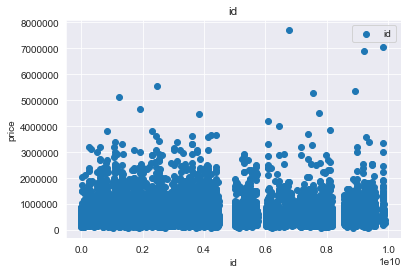

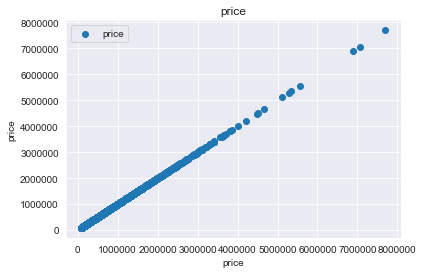

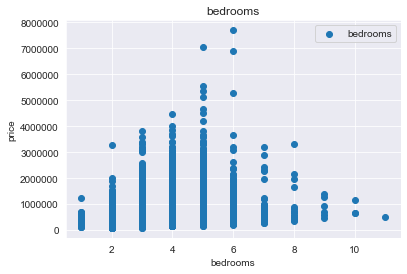

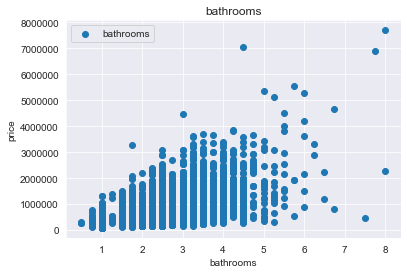

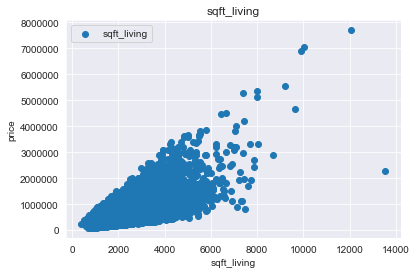

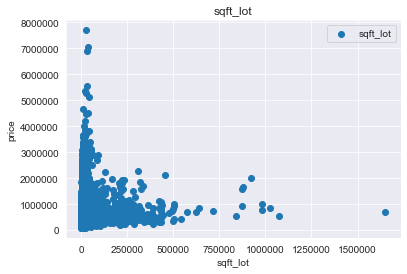

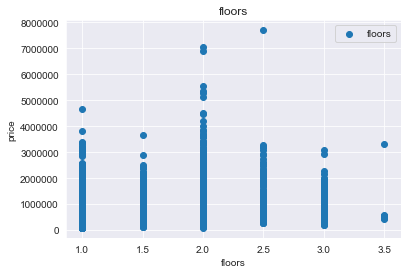

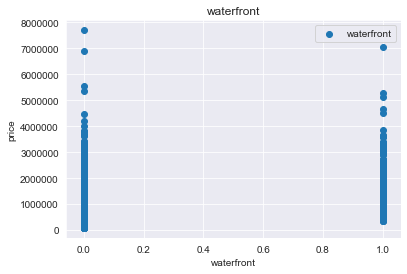

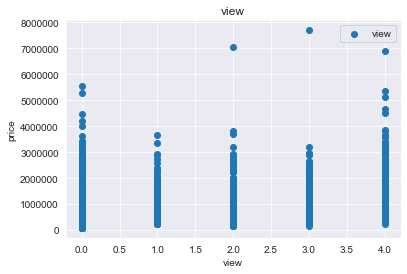

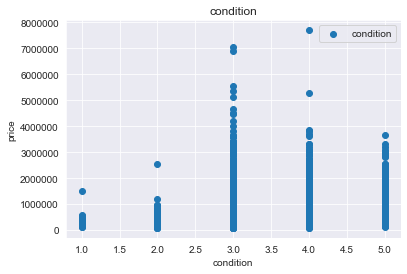

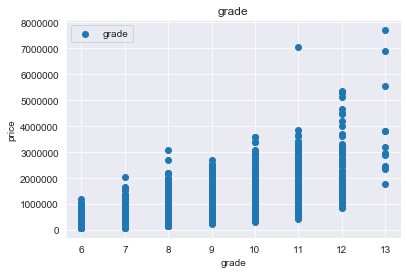

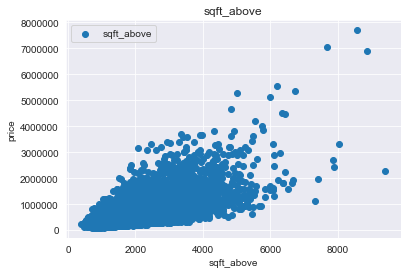

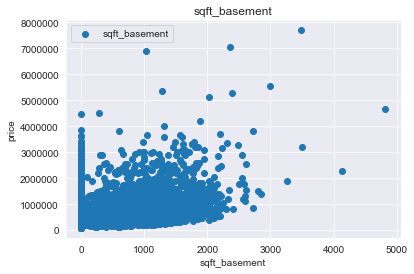

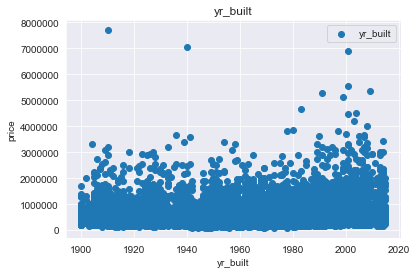

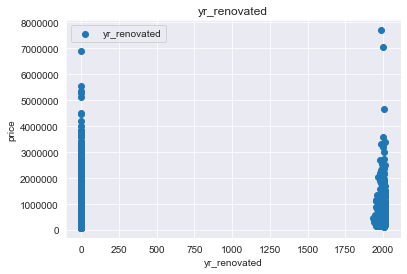

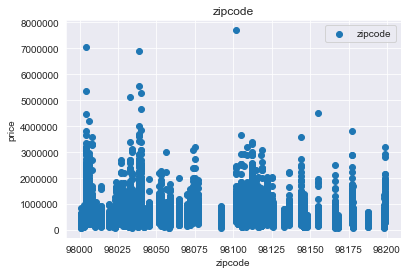

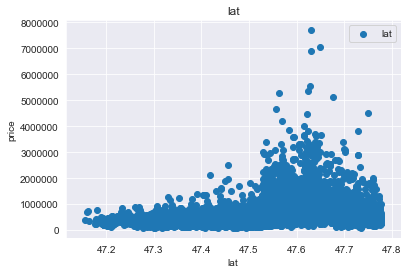

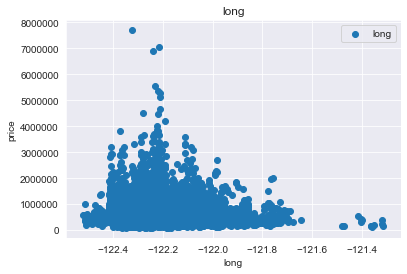

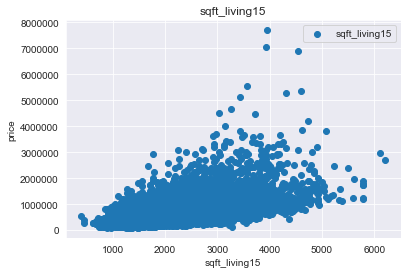

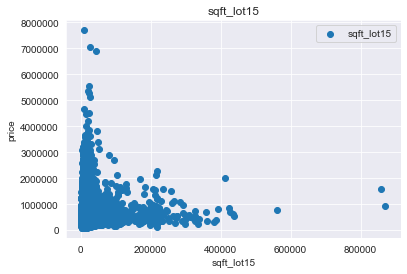

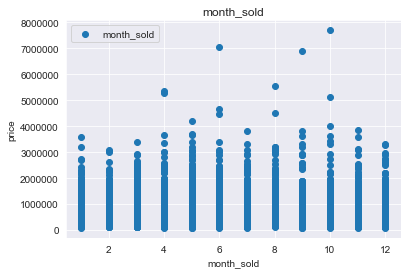

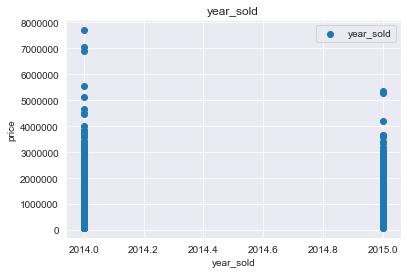

In [42]:
# Plotting all columns in order to distinguish between categorical and continuous variables
for col in data5.columns: 
    plt.scatter(data5[col], data5.price, label=col)
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(col)
    plt.show()

The following variables were immediately observed to be categorical variables:
bedrooms, bathrooms, floors, waterfront, view, condition, grade, zipcode, month_sold, year_sold

Certain variables could be converted to binary variables for ease of analysis. These variables are view, yr_renovated, year_sold. I will first work on the binary variables before deciding how to handle the categorical variables.

### Binary Columns 

In [43]:
# Creates a new column and maps a 1 if the house has been renovated or a 0 if not

data5['is_renovated'] = data5['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
data5.drop(['yr_renovated'], axis = 1, inplace = True)
data5.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,is_renovated
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,98178,47.5112,-122.257,1340,5650,10,2014,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,98125,47.7210,-122.319,1690,7639,12,2014,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,98028,47.7379,-122.233,2720,8062,2,2015,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,98136,47.5208,-122.393,1360,5000,12,2014,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,98074,47.6168,-122.045,1800,7503,2,2015,0


In [44]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21158 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21158 non-null  int64  
 1   price          21158 non-null  float64
 2   bedrooms       21158 non-null  int64  
 3   bathrooms      21158 non-null  float64
 4   sqft_living    21158 non-null  int64  
 5   sqft_lot       21158 non-null  int64  
 6   floors         21158 non-null  float64
 7   waterfront     21158 non-null  int64  
 8   view           21158 non-null  int64  
 9   condition      21158 non-null  int64  
 10  grade          21158 non-null  int64  
 11  sqft_above     21158 non-null  int64  
 12  sqft_basement  21158 non-null  int64  
 13  yr_built       21158 non-null  int64  
 14  zipcode        21158 non-null  int64  
 15  lat            21158 non-null  float64
 16  long           21158 non-null  float64
 17  sqft_living15  21158 non-null  int64  
 18  sqft_l

In [45]:
# Created a viewed column and dropping unneeded view column
data5['was_viewed'] = data5['view'].map(lambda x: 1 if x > 0 else 0)
data5.drop(['view'], axis = 1, inplace = True)
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21158 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21158 non-null  int64  
 1   price          21158 non-null  float64
 2   bedrooms       21158 non-null  int64  
 3   bathrooms      21158 non-null  float64
 4   sqft_living    21158 non-null  int64  
 5   sqft_lot       21158 non-null  int64  
 6   floors         21158 non-null  float64
 7   waterfront     21158 non-null  int64  
 8   condition      21158 non-null  int64  
 9   grade          21158 non-null  int64  
 10  sqft_above     21158 non-null  int64  
 11  sqft_basement  21158 non-null  int64  
 12  yr_built       21158 non-null  int64  
 13  zipcode        21158 non-null  int64  
 14  lat            21158 non-null  float64
 15  long           21158 non-null  float64
 16  sqft_living15  21158 non-null  int64  
 17  sqft_lot15     21158 non-null  int64  
 18  month_

In [46]:
# Created a sold in 2014 column
data5['2014_sold'] = data5['year_sold'].map(lambda x: 1 if x == 2014 else 0)
data5.drop(['year_sold'], axis = 1, inplace = True)
data5.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,is_renovated,was_viewed,2014_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,3,7,...,1955,98178,47.5112,-122.257,1340,5650,10,0,0,1
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,3,7,...,1951,98125,47.7210,-122.319,1690,7639,12,1,0,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,3,6,...,1933,98028,47.7379,-122.233,2720,8062,2,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,7,...,1965,98136,47.5208,-122.393,1360,5000,12,0,0,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,3,8,...,1987,98074,47.6168,-122.045,1800,7503,2,0,0,0


In [47]:
# Converting basement to binary column because it is a zero inflated variable
data5['has_basement'] = data5['sqft_basement'].map(lambda x: 1 if x > 0 else 0)
data5.drop(['sqft_basement'], axis = 1, inplace = True)
data5.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,is_renovated,was_viewed,2014_sold,has_basement
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,3,7,...,98178,47.5112,-122.257,1340,5650,10,0,0,1,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,3,7,...,98125,47.7210,-122.319,1690,7639,12,1,0,1,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,3,6,...,98028,47.7379,-122.233,2720,8062,2,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,7,...,98136,47.5208,-122.393,1360,5000,12,0,0,1,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,3,8,...,98074,47.6168,-122.045,1800,7503,2,0,0,0,0


## Exporting Cleaned Dataset 

Before adding all of the dummy variables to this dataframe, I saved a copy for reference of the dataset cleaned up to this point.

In [48]:
cleaned_data = data5
cleaned_data.to_csv("Data/king_county_cleaned.csv", index=False)

## Creating Dummy Variables 

I will now create dummy variables for certain categorical variables. The remaining variables will be dealt with by binning them into appropriate columns.

In [49]:
dummytest = data5
dummytest.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,is_renovated,was_viewed,2014_sold,has_basement
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,3,7,...,98178,47.5112,-122.257,1340,5650,10,0,0,1,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,3,7,...,98125,47.7210,-122.319,1690,7639,12,1,0,1,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,3,6,...,98028,47.7379,-122.233,2720,8062,2,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,7,...,98136,47.5208,-122.393,1360,5000,12,0,0,1,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,3,8,...,98074,47.6168,-122.045,1800,7503,2,0,0,0,0


In [50]:
condition = pd.get_dummies(dummytest['condition'], prefix = 'condition', drop_first=True, dtype=int)
condition.head()

,condition_2,condition_3,condition_4,condition_5
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0


In [51]:
dummy_df1 = pd.concat([dummytest, condition], axis=1)
dummy_df1.drop(['condition'], axis = 1, inplace = True)
dummy_df1.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,...,sqft_lot15,month_sold,is_renovated,was_viewed,2014_sold,has_basement,condition_2,condition_3,condition_4,condition_5
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,7,1180,...,5650,10,0,0,1,0,0,1,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,7,2170,...,7639,12,1,0,1,1,0,1,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,6,770,...,8062,2,0,0,0,0,0,1,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,7,1050,...,5000,12,0,0,1,1,0,0,0,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,8,1680,...,7503,2,0,0,0,0,0,1,0,0


In [52]:
dummy_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21158 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21158 non-null  int64  
 1   price          21158 non-null  float64
 2   bedrooms       21158 non-null  int64  
 3   bathrooms      21158 non-null  float64
 4   sqft_living    21158 non-null  int64  
 5   sqft_lot       21158 non-null  int64  
 6   floors         21158 non-null  float64
 7   waterfront     21158 non-null  int64  
 8   grade          21158 non-null  int64  
 9   sqft_above     21158 non-null  int64  
 10  yr_built       21158 non-null  int64  
 11  zipcode        21158 non-null  int64  
 12  lat            21158 non-null  float64
 13  long           21158 non-null  float64
 14  sqft_living15  21158 non-null  int64  
 15  sqft_lot15     21158 non-null  int64  
 16  month_sold     21158 non-null  int64  
 17  is_renovated   21158 non-null  int64  
 18  was_vi

That takes care of the dummy variables for most of the columns. Now I will address the columns that will need to be transformed through binning

### Binning Categorical Variables 

In order to reduce the number of dummy variables created for the following columns, I decided to cut the column values into bins and then create dummy variables for those bins.

#### Bedrooms

In [53]:
dummy_bins = dummy_df1
bins = [0, 2, 5, 8, 11]
bins_bed = pd.cut(dummy_bins['bedrooms'], bins)
bins_bed = bins_bed.cat.as_ordered()
bins_bed.head()

0    (2, 5]
1    (2, 5]
2    (0, 2]
3    (2, 5]
4    (2, 5]
Name: bedrooms, dtype: category
Categories (4, interval[int64]): [(0, 2] < (2, 5] < (5, 8] < (8, 11]]

Text(0.5, 1.0, 'Bedroom Bins')

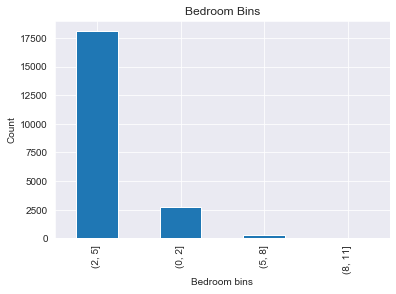

In [54]:
bins_bed.value_counts().plot(kind='bar')
plt.xlabel('Bedroom bins')
plt.ylabel('Count')
plt.title('Bedroom Bins')

In [55]:
# Creates dummy variables for the bin variables and drops unneeded grade column
dummy_bins['bedrooms']= bins_bed
dummy_bins['bedrooms'] = dummy_bins['bedrooms'].cat.codes
bed_dummy = pd.get_dummies(bins_bed, prefix='bedrooms')
df1 = dummy_bins
df1.drop(['bedrooms'], axis=1, inplace = True)
df1 = pd.concat([dummy_bins, bed_dummy], axis=1)
df1.head()

,id,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,yr_built,...,2014_sold,has_basement,condition_2,condition_3,condition_4,condition_5,"bedrooms_(0, 2]","bedrooms_(2, 5]","bedrooms_(5, 8]","bedrooms_(8, 11]"
0,7129300520,221900.0,1.00,1180,5650,1.0,0,7,1180,1955,...,1,0,0,1,0,0,0,1,0,0
1,6414100192,538000.0,2.25,2570,7242,2.0,0,7,2170,1951,...,1,1,0,1,0,0,0,1,0,0
2,5631500400,180000.0,1.00,770,10000,1.0,0,6,770,1933,...,0,0,0,1,0,0,1,0,0,0
3,2487200875,604000.0,3.00,1960,5000,1.0,0,7,1050,1965,...,1,1,0,0,0,1,0,1,0,0
4,1954400510,510000.0,2.00,1680,8080,1.0,0,8,1680,1987,...,0,0,0,1,0,0,0,1,0,0


In [56]:
df1.drop(['bedrooms_(8, 11]'], axis = 1, inplace = True)
df1 = df1.rename(columns={
       'bedrooms_(0, 2]':'bedrooms_1_2', 'bedrooms_(2, 5]':'bedrooms_3_5', 'bedrooms_(5, 8]':'bedrooms_6_8'})
df1.head()

,id,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,yr_built,...,was_viewed,2014_sold,has_basement,condition_2,condition_3,condition_4,condition_5,bedrooms_1_2,bedrooms_3_5,bedrooms_6_8
0,7129300520,221900.0,1.00,1180,5650,1.0,0,7,1180,1955,...,0,1,0,0,1,0,0,0,1,0
1,6414100192,538000.0,2.25,2570,7242,2.0,0,7,2170,1951,...,0,1,1,0,1,0,0,0,1,0
2,5631500400,180000.0,1.00,770,10000,1.0,0,6,770,1933,...,0,0,0,0,1,0,0,1,0,0
3,2487200875,604000.0,3.00,1960,5000,1.0,0,7,1050,1965,...,0,1,1,0,0,0,1,0,1,0
4,1954400510,510000.0,2.00,1680,8080,1.0,0,8,1680,1987,...,0,0,0,0,1,0,0,0,1,0


#### Grade 

In [57]:
# Create bins for Grade column and bins the column's value accordingly 
bins = [5, 6, 8, 10, 13]
bins_grd = pd.cut(df1['grade'], bins)
bins_grd = bins_grd.cat.as_ordered()
bins_grd.head()

0    (6, 8]
1    (6, 8]
2    (5, 6]
3    (6, 8]
4    (6, 8]
Name: grade, dtype: category
Categories (4, interval[int64]): [(5, 6] < (6, 8] < (8, 10] < (10, 13]]

Text(0.5, 1.0, 'Grade Bins')

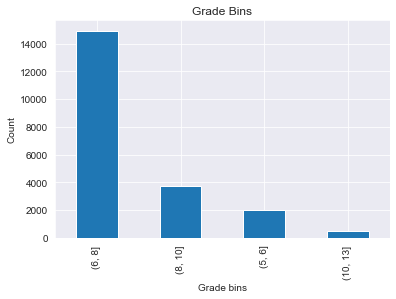

In [58]:
bins_grd.value_counts().plot(kind='bar')
plt.xlabel('Grade bins')
plt.ylabel('Count')
plt.title('Grade Bins')

In [59]:
# Creates dummy variables for the bin variables and drops unneeded grade column
df1['grade']= bins_grd
df1['grade'] = df1['grade'].cat.codes
grd_dummy = pd.get_dummies(bins_grd, prefix='grd', drop_first=True)
df2 = df1.drop(['grade'], axis=1, inplace = True)
df2 = pd.concat([df1, grd_dummy], axis=1)
df2.head()

,id,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,yr_built,zipcode,...,condition_2,condition_3,condition_4,condition_5,bedrooms_1_2,bedrooms_3_5,bedrooms_6_8,"grd_(6, 8]","grd_(8, 10]","grd_(10, 13]"
0,7129300520,221900.0,1.00,1180,5650,1.0,0,1180,1955,98178,...,0,1,0,0,0,1,0,1,0,0
1,6414100192,538000.0,2.25,2570,7242,2.0,0,2170,1951,98125,...,0,1,0,0,0,1,0,1,0,0
2,5631500400,180000.0,1.00,770,10000,1.0,0,770,1933,98028,...,0,1,0,0,1,0,0,0,0,0
3,2487200875,604000.0,3.00,1960,5000,1.0,0,1050,1965,98136,...,0,0,0,1,0,1,0,1,0,0
4,1954400510,510000.0,2.00,1680,8080,1.0,0,1680,1987,98074,...,0,1,0,0,0,1,0,1,0,0


In [60]:
# rename column to match appropriate designation for grade
df_dv2 = df2.rename(columns={
       'grd_(5, 6]':'grade_poor', 'grd_(6, 8]':'grade_average', 'grd_(8, 10]':'grade_good', 'grd_(10, 13]':'grade_excellent'})
df_dv2.head()

,id,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,yr_built,zipcode,...,condition_2,condition_3,condition_4,condition_5,bedrooms_1_2,bedrooms_3_5,bedrooms_6_8,grade_average,grade_good,grade_excellent
0,7129300520,221900.0,1.00,1180,5650,1.0,0,1180,1955,98178,...,0,1,0,0,0,1,0,1,0,0
1,6414100192,538000.0,2.25,2570,7242,2.0,0,2170,1951,98125,...,0,1,0,0,0,1,0,1,0,0
2,5631500400,180000.0,1.00,770,10000,1.0,0,770,1933,98028,...,0,1,0,0,1,0,0,0,0,0
3,2487200875,604000.0,3.00,1960,5000,1.0,0,1050,1965,98136,...,0,0,0,1,0,1,0,1,0,0
4,1954400510,510000.0,2.00,1680,8080,1.0,0,1680,1987,98074,...,0,1,0,0,0,1,0,1,0,0


#### Months

In [61]:
# Create bins for Month column and bins the column's value accordingly 
bins = [0, 3, 6, 9, 12]
bins_mnth = pd.cut(df_dv2['month_sold'], bins)
bins_mnth = bins_mnth.cat.as_ordered()
bins_mnth.head()

0    (9, 12]
1    (9, 12]
2     (0, 3]
3    (9, 12]
4     (0, 3]
Name: month_sold, dtype: category
Categories (4, interval[int64]): [(0, 3] < (3, 6] < (6, 9] < (9, 12]]

Text(0.5, 1.0, 'Month Bins')

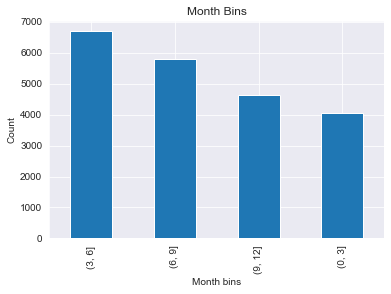

In [62]:
bins_mnth.value_counts().plot(kind='bar')
plt.xlabel('Month bins')
plt.ylabel('Count')
plt.title('Month Bins')

In [63]:
# Creates dummy variables for the bin variables and drops unneeded grade column
df_dv2['month_sold']= bins_mnth
df_dv2['month_sold'] = df_dv2['month_sold'].cat.codes
grd_dummy = pd.get_dummies(bins_mnth, prefix='months_sold', drop_first=True)
df3 = df_dv2
df3.drop(['month_sold'], axis=1, inplace = True)
df3 = pd.concat([df_dv2, grd_dummy], axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21158 entries, 0 to 21596
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   21158 non-null  int64  
 1   price                21158 non-null  float64
 2   bathrooms            21158 non-null  float64
 3   sqft_living          21158 non-null  int64  
 4   sqft_lot             21158 non-null  int64  
 5   floors               21158 non-null  float64
 6   waterfront           21158 non-null  int64  
 7   sqft_above           21158 non-null  int64  
 8   yr_built             21158 non-null  int64  
 9   zipcode              21158 non-null  int64  
 10  lat                  21158 non-null  float64
 11  long                 21158 non-null  float64
 12  sqft_living15        21158 non-null  int64  
 13  sqft_lot15           21158 non-null  int64  
 14  is_renovated         21158 non-null  int64  
 15  was_viewed           21158 non-null 

In [64]:
df_dv2 = df3.rename(columns={
       'months_sold_(0, 3]':'sold_quarter_one', 'months_sold_(3, 6]':'sold_quarter_two',
    'months_sold_(6, 9]':'sold_quarter_three', 'months_sold_(9, 12]':'sold_quarter_four'})

df_dv2.head()

,id,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,yr_built,zipcode,...,condition_5,bedrooms_1_2,bedrooms_3_5,bedrooms_6_8,grade_average,grade_good,grade_excellent,sold_quarter_two,sold_quarter_three,sold_quarter_four
0,7129300520,221900.0,1.00,1180,5650,1.0,0,1180,1955,98178,...,0,0,1,0,1,0,0,0,0,1
1,6414100192,538000.0,2.25,2570,7242,2.0,0,2170,1951,98125,...,0,0,1,0,1,0,0,0,0,1
2,5631500400,180000.0,1.00,770,10000,1.0,0,770,1933,98028,...,0,1,0,0,0,0,0,0,0,0
3,2487200875,604000.0,3.00,1960,5000,1.0,0,1050,1965,98136,...,1,0,1,0,1,0,0,0,0,1
4,1954400510,510000.0,2.00,1680,8080,1.0,0,1680,1987,98074,...,0,0,1,0,1,0,0,0,0,0


#### Zipcode and Cities

Dealing with the zipcode column 

In [65]:
df_dv2.columns

Index(['id', 'price', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'sqft_above', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'is_renovated', 'was_viewed',
       '2014_sold', 'has_basement', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'bedrooms_1_2', 'bedrooms_3_5',
       'bedrooms_6_8', 'grade_average', 'grade_good', 'grade_excellent',
       'sold_quarter_two', 'sold_quarter_three', 'sold_quarter_four'],
      dtype='object')

In [66]:
df_dv2['zipcode'].nunique() 

70

Having 70 different zip codes is not practical in terms of creating that many dummy variables for each zipcode. Instead I will attribute a city to each zip code and create dummy variables for each city.

Originally, I used every city listed on the website but it produced 30+ columns for each city. Adding a large number of variables to the model reduces its efficacy. My final approach was to use the city's actual name if it consisted of more than one zipcode. If not, it was designated as "Other"

In [67]:
# Zipcodes and city taken from the following link:
# https://www.bestplaces.net/find/zip.aspx?county=53033&st=WA

cities = pd.read_csv('Data/king_county_zipcodes_updated.csv')
cities.head()

,zipcode,city
0,98002,Auburn
1,98092,Auburn
2,98224,Other
3,98004,Bellevue
4,98005,Bellevue


In [68]:
# Joining the previous dataframe with the cities dataframe on zipcode
df_dv2 = df_dv2.join(cities.set_index('zipcode'), on = 'zipcode', how = 'left')
df_dv2.head()

,id,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,yr_built,zipcode,...,bedrooms_1_2,bedrooms_3_5,bedrooms_6_8,grade_average,grade_good,grade_excellent,sold_quarter_two,sold_quarter_three,sold_quarter_four,city
0,7129300520,221900.0,1.00,1180,5650,1.0,0,1180,1955,98178,...,0,1,0,1,0,0,0,0,1,Other
1,6414100192,538000.0,2.25,2570,7242,2.0,0,2170,1951,98125,...,0,1,0,1,0,0,0,0,1,Seattle
2,5631500400,180000.0,1.00,770,10000,1.0,0,770,1933,98028,...,1,0,0,0,0,0,0,0,0,Other
3,2487200875,604000.0,3.00,1960,5000,1.0,0,1050,1965,98136,...,0,1,0,1,0,0,0,0,1,Seattle
4,1954400510,510000.0,2.00,1680,8080,1.0,0,1680,1987,98074,...,0,1,0,1,0,0,0,0,0,Sammamish


In [69]:
condition = pd.get_dummies(df_dv2['city'], prefix = 'city', drop_first=True)
condition.head()

,city_Bellevue,city_Burien,city_Federal Way,city_Issaquah,city_Kent,city_Kirkland,city_Other,city_Renton,city_Sammamish,city_Seattle,city_Shoreline
0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,0


In [70]:
dummy_cities = pd.concat([df_dv2, condition], axis=1)
dummy_cities.drop(['city'], axis = 1, inplace = True)
dummy_cities.drop(['zipcode'], axis = 1, inplace = True)
dummy_cities.head()

,id,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,yr_built,lat,...,city_Burien,city_Federal Way,city_Issaquah,city_Kent,city_Kirkland,city_Other,city_Renton,city_Sammamish,city_Seattle,city_Shoreline
0,7129300520,221900.0,1.00,1180,5650,1.0,0,1180,1955,47.5112,...,0,0,0,0,0,1,0,0,0,0
1,6414100192,538000.0,2.25,2570,7242,2.0,0,2170,1951,47.7210,...,0,0,0,0,0,0,0,0,1,0
2,5631500400,180000.0,1.00,770,10000,1.0,0,770,1933,47.7379,...,0,0,0,0,0,1,0,0,0,0
3,2487200875,604000.0,3.00,1960,5000,1.0,0,1050,1965,47.5208,...,0,0,0,0,0,0,0,0,1,0
4,1954400510,510000.0,2.00,1680,8080,1.0,0,1680,1987,47.6168,...,0,0,0,0,0,0,0,1,0,0


#### Floors 

In [71]:
# Create bins for Floors column and bins the column's value accordingly 
bins = [0, 1.9, 2.9, 3.9]
bins_floor = pd.cut(dummy_cities['floors'], bins)
bins_floor = bins_floor.cat.as_ordered()
bins_floor.head()

0    (0.0, 1.9]
1    (1.9, 2.9]
2    (0.0, 1.9]
3    (0.0, 1.9]
4    (0.0, 1.9]
Name: floors, dtype: category
Categories (3, interval[float64]): [(0.0, 1.9] < (1.9, 2.9] < (2.9, 3.9]]

Text(0.5, 1.0, 'Floor Bins')

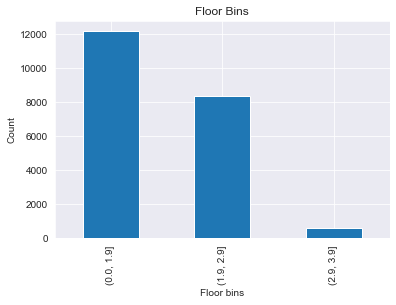

In [72]:
bins_floor.value_counts().plot(kind='bar')
plt.xlabel('Floor bins')
plt.ylabel('Count')
plt.title('Floor Bins')

In [73]:
# Creates dummy variables for the floor variables and drops unneeded grade column
dummy_cities['floors']= bins_floor
dummy_cities['floors'] = dummy_cities['floors'].cat.codes
floor_dummy = pd.get_dummies(bins_floor, prefix='floors')
floor_df = dummy_cities
floor_df.drop(['floors'], axis=1, inplace = True)
floor_df = pd.concat([dummy_cities, floor_dummy], axis=1)
floor_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21158 entries, 0 to 21596
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  21158 non-null  int64  
 1   price               21158 non-null  float64
 2   bathrooms           21158 non-null  float64
 3   sqft_living         21158 non-null  int64  
 4   sqft_lot            21158 non-null  int64  
 5   waterfront          21158 non-null  int64  
 6   sqft_above          21158 non-null  int64  
 7   yr_built            21158 non-null  int64  
 8   lat                 21158 non-null  float64
 9   long                21158 non-null  float64
 10  sqft_living15       21158 non-null  int64  
 11  sqft_lot15          21158 non-null  int64  
 12  is_renovated        21158 non-null  int64  
 13  was_viewed          21158 non-null  int64  
 14  2014_sold           21158 non-null  int64  
 15  has_basement        21158 non-null  int64  
 16  cond

In [74]:
cleaned_with_dummies = floor_df.rename(columns={
       'floors_(0.0, 1.9]':'floors_1', 'floors_(1.9, 2.9]':'floors_2'})
cleaned_with_dummies.drop(['floors_(2.9, 3.9]'], axis=1, inplace = True)
cleaned_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21158 entries, 0 to 21596
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  21158 non-null  int64  
 1   price               21158 non-null  float64
 2   bathrooms           21158 non-null  float64
 3   sqft_living         21158 non-null  int64  
 4   sqft_lot            21158 non-null  int64  
 5   waterfront          21158 non-null  int64  
 6   sqft_above          21158 non-null  int64  
 7   yr_built            21158 non-null  int64  
 8   lat                 21158 non-null  float64
 9   long                21158 non-null  float64
 10  sqft_living15       21158 non-null  int64  
 11  sqft_lot15          21158 non-null  int64  
 12  is_renovated        21158 non-null  int64  
 13  was_viewed          21158 non-null  int64  
 14  2014_sold           21158 non-null  int64  
 15  has_basement        21158 non-null  int64  
 16  cond

#### Bathrooms 

In [75]:
# Create bins for Bathrooms column and bins the column's value accordingly 
bins = [0, 1, 2, 3, 8]
bins_bath = pd.cut(dummy_cities['bathrooms'], bins)
bins_bath = bins_bath.cat.as_ordered()
bins_bath.head()

0    (0, 1]
1    (2, 3]
2    (0, 1]
3    (2, 3]
4    (1, 2]
Name: bathrooms, dtype: category
Categories (4, interval[int64]): [(0, 1] < (1, 2] < (2, 3] < (3, 8]]

Text(0.5, 1.0, 'Bath Bins')

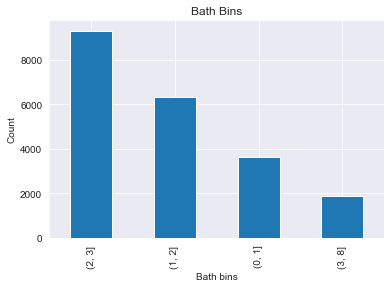

In [76]:
bins_bath.value_counts().plot(kind='bar')
plt.xlabel('Bath bins')
plt.ylabel('Count')
plt.title('Bath Bins')

In [77]:
# Creates dummy variables for the floor variables and drops unneeded grade column
dummy_cities['bathrooms']= bins_bath
dummy_cities['bathrooms'] = dummy_cities['bathrooms'].cat.codes
bath_dummy = pd.get_dummies(bins_bath, prefix='bathrooms')
bath_df = dummy_cities
bath_df.drop(['bathrooms'], axis=1, inplace = True)
bath_df = pd.concat([dummy_cities, bath_dummy], axis=1)
bath_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21158 entries, 0 to 21596
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  21158 non-null  int64  
 1   price               21158 non-null  float64
 2   sqft_living         21158 non-null  int64  
 3   sqft_lot            21158 non-null  int64  
 4   waterfront          21158 non-null  int64  
 5   sqft_above          21158 non-null  int64  
 6   yr_built            21158 non-null  int64  
 7   lat                 21158 non-null  float64
 8   long                21158 non-null  float64
 9   sqft_living15       21158 non-null  int64  
 10  sqft_lot15          21158 non-null  int64  
 11  is_renovated        21158 non-null  int64  
 12  was_viewed          21158 non-null  int64  
 13  2014_sold           21158 non-null  int64  
 14  has_basement        21158 non-null  int64  
 15  condition_2         21158 non-null  int32  
 16  cond

In [78]:
cleaned_with_dummies = bath_df.rename(columns={
       'bathrooms_(0, 1]':'bathrooms_01', 'bathrooms_(1, 2]':'bathrooms_12',
       'bathrooms_(2, 3]':'bathrooms_23','bathrooms_(3, 8]':'bathrooms_3over'})
cleaned_with_dummies.drop(['bathrooms_01'], axis=1, inplace = True)
cleaned_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21158 entries, 0 to 21596
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  21158 non-null  int64  
 1   price               21158 non-null  float64
 2   sqft_living         21158 non-null  int64  
 3   sqft_lot            21158 non-null  int64  
 4   waterfront          21158 non-null  int64  
 5   sqft_above          21158 non-null  int64  
 6   yr_built            21158 non-null  int64  
 7   lat                 21158 non-null  float64
 8   long                21158 non-null  float64
 9   sqft_living15       21158 non-null  int64  
 10  sqft_lot15          21158 non-null  int64  
 11  is_renovated        21158 non-null  int64  
 12  was_viewed          21158 non-null  int64  
 13  2014_sold           21158 non-null  int64  
 14  has_basement        21158 non-null  int64  
 15  condition_2         21158 non-null  int32  
 16  cond

# Question 1: What effect does a house's yard size have on its price?

Having a large house yard is a highly desirable feature for a new house. I wanted to examine whether a larger yard is indicative of a more expensive house.

In [79]:
data6 = data5
data6

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,is_renovated,was_viewed,2014_sold,has_basement
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,3,7,...,98178,47.5112,-122.257,1340,5650,10,0,0,1,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,3,7,...,98125,47.7210,-122.319,1690,7639,12,1,0,1,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,3,6,...,98028,47.7379,-122.233,2720,8062,2,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,7,...,98136,47.5208,-122.393,1360,5000,12,0,0,1,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,3,8,...,98074,47.6168,-122.045,1800,7503,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,3,8,...,98103,47.6993,-122.346,1530,1509,5,0,0,1,0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,3,8,...,98146,47.5107,-122.362,1830,7200,2,0,0,0,0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,3,7,...,98144,47.5944,-122.299,1020,2007,6,0,0,1,0
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0,3,8,...,98027,47.5345,-122.069,1410,1287,1,0,0,0,0


In [80]:
#Creating the yard size column by subtracting the sqft of the house from the lot
data6['sqft_yard'] = data6['sqft_lot'] - data6['sqft_living']
data6

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,lat,long,sqft_living15,sqft_lot15,month_sold,is_renovated,was_viewed,2014_sold,has_basement,sqft_yard
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,3,7,...,47.5112,-122.257,1340,5650,10,0,0,1,0,4470
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,3,7,...,47.7210,-122.319,1690,7639,12,1,0,1,1,4672
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,3,6,...,47.7379,-122.233,2720,8062,2,0,0,0,0,9230
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,7,...,47.5208,-122.393,1360,5000,12,0,0,1,1,3040
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,3,8,...,47.6168,-122.045,1800,7503,2,0,0,0,0,6400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,3,8,...,47.6993,-122.346,1530,1509,5,0,0,1,0,-399
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,3,8,...,47.5107,-122.362,1830,7200,2,0,0,0,0,3503
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,3,7,...,47.5944,-122.299,1020,2007,6,0,0,1,0,330
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0,3,8,...,47.5345,-122.069,1410,1287,1,0,0,0,0,788


In [81]:
data6.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,lat,long,sqft_living15,sqft_lot15,month_sold,is_renovated,was_viewed,2014_sold,has_basement,sqft_yard
count,2.115800e+04,2.115800e+04,21158.000000,21158.000000,21158.000000,2.115800e+04,21158.000000,21158.000000,21158.000000,21158.000000,...,21158.000000,21158.000000,21158.000000,21158.000000,21158.000000,21158.000000,21158.000000,21158.000000,21158.000000,2.115800e+04
mean,4.588512e+09,5.455185e+05,3.385812,2.131156,2097.155024,1.502280e+04,1.501087,0.006711,3.409821,7.697136,...,47.560977,-122.214029,1995.783581,12735.535259,6.565696,0.034739,0.098686,0.675395,0.397107,1.292565e+04
std,2.876224e+09,3.681210e+05,0.893793,0.763959,914.866659,4.069941e+04,0.541010,0.081650,0.645864,1.137003,...,0.138582,0.140020,685.081296,27243.063318,3.115827,0.183121,0.298247,0.468238,0.489310,4.054266e+04
min,1.000102e+06,8.400000e+04,1.000000,0.500000,390.000000,5.200000e+02,1.000000,0.000000,1.000000,6.000000,...,47.155900,-122.519000,399.000000,651.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.900000e+03
25%,2.125570e+09,3.250000e+05,3.000000,1.750000,1440.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,...,47.471800,-122.328000,1494.250000,5100.000000,4.000000,0.000000,0.000000,0.000000,0.000000,3.060000e+03
50%,3.905010e+09,4.550000e+05,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,3.000000,7.000000,...,47.573750,-122.230000,1850.000000,7620.000000,6.000000,0.000000,0.000000,1.000000,0.000000,5.690000e+03
75%,7.327500e+09,6.500000e+05,4.000000,2.500000,2560.000000,1.065975e+04,2.000000,0.000000,4.000000,8.000000,...,47.678500,-122.124000,2370.000000,10078.750000,9.000000,0.000000,0.000000,1.000000,1.000000,8.646750e+03
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,...,47.777600,-121.315000,6210.000000,871200.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.650059e+06


In [82]:
# Removing instances where sqft_yard is negative. Mostly seen with houses with
# multiple floors 

yard_area = data6.loc[data6['sqft_yard'] > 0]

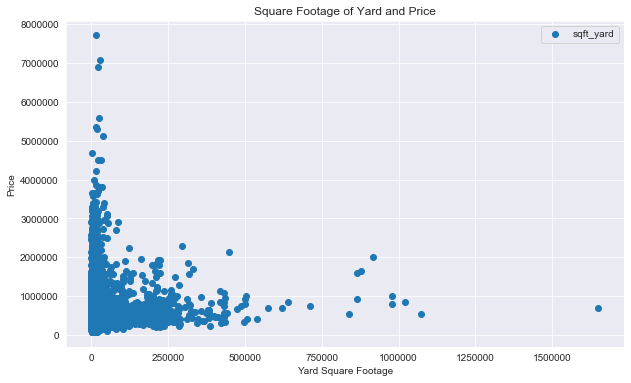

In [83]:
plt.figure(figsize = (10,6))
plt.scatter(yard_area['sqft_yard'], yard_area.price, label='sqft_yard')
plt.legend()
plt.xlabel('Yard Square Footage')
plt.ylabel('Price')
plt.title('Square Footage of Yard and Price')
plt.show()

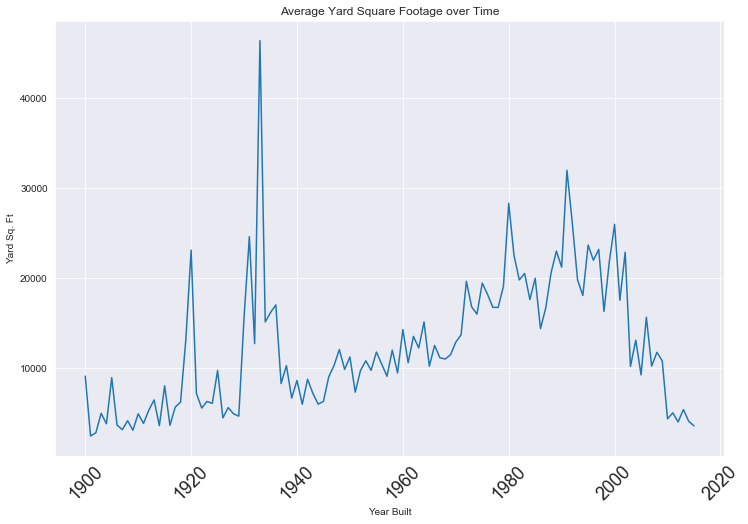

In [84]:
plt.figure(figsize = (12,8))
#sns.set_context("poster")
sns.lineplot(x = 'yr_built', y = 'sqft_yard', data=yard_area, ci = None)
plt.xticks(fontsize=18, rotation = 45)
plt.xlabel('Year Built')
plt.ylabel('Yard Sq. Ft')
plt.title('Average Yard Square Footage over Time')
plt.show()

No handles with labels found to put in legend.


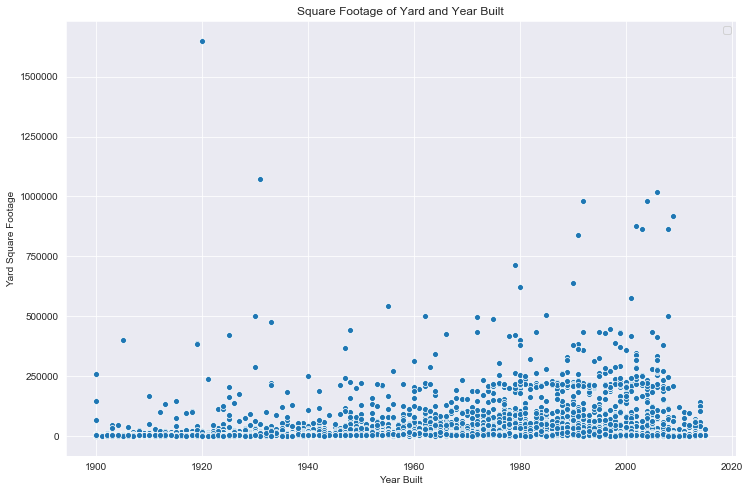

In [85]:
plt.figure(figsize = (12,8))
#sns.set_context("poster")
sns.scatterplot(x = 'yr_built', y = 'sqft_yard', data=yard_area)
plt.xlabel('Year Built')
plt.ylabel('Yard Square Footage')
plt.title('Square Footage of Yard and Year Built')
plt.legend(fancybox=True)
plt.show()

# Question 2: How does a bedroom to bathroom ratio affect the price of a house?

Having an appropriate amount of bedrooms and bathrooms is ideal for homeowners seeking a family house. For this we wanted to see whether the ratio of bedroom to bathrooms would impact the price of a house. A lower ratio is more ideal.

In [86]:
data7 = data4
data7.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [87]:
# Creates the column for the bed/bath ratio. I limited the ratio to below 4
# as it wouldn't be an ideal setup in a house for larger families

data7['bedrooms'] = data7['bedrooms'].astype('int64')
data7['bed_bath_ratio'] = round(data7['bedrooms'] / data7['bathrooms'],2)
bed_bath = data7.loc[data7['bed_bath_ratio'] < 4]

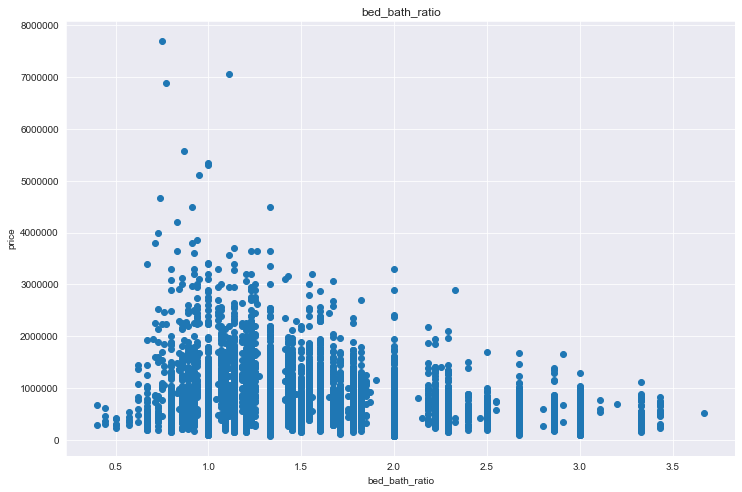

In [88]:
plt.figure(figsize = (12,8))
plt.scatter(bed_bath['bed_bath_ratio'], bed_bath.price, label='bed_bath_ratio')
plt.xlabel('bed_bath_ratio')
plt.ylabel('price')
plt.title('bed_bath_ratio')
plt.show()

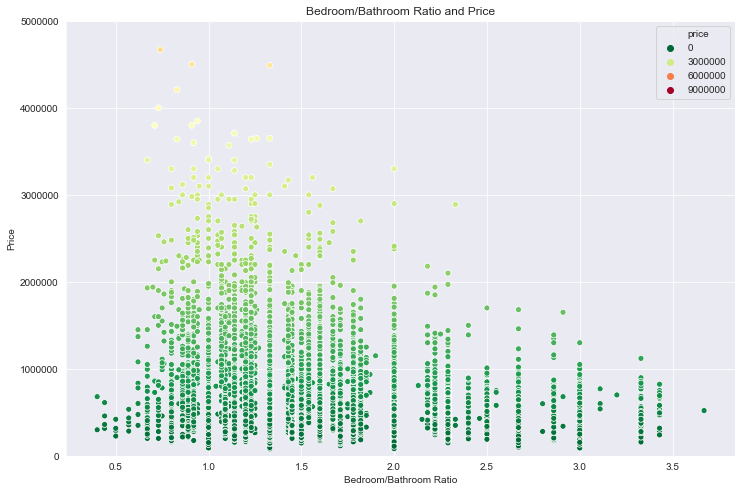

In [89]:
plt.figure(figsize = (12,8))
#sns.set_context("poster")
sns.scatterplot(x = 'bed_bath_ratio', y = 'price', data=bed_bath, hue= 'price', palette = 'RdYlGn_r')
#sns.regplot(x = 'bed_bath_ratio', y = 'price', data=bed_bath, color = 'green')
plt.xlabel('Bedroom/Bathroom Ratio')
plt.ylabel('Price')
plt.title('Bedroom/Bathroom Ratio and Price')
plt.ylim(0,5000000)
plt.show()

I observed that lower ratios generally corresponded with higher house prices. This would be in part due to houses that contained a high and near identical number of bedrooms and bathrooms. Home buyers that are planning larger families would have to plan accordingly as to what structure they want in their home.

No handles with labels found to put in legend.


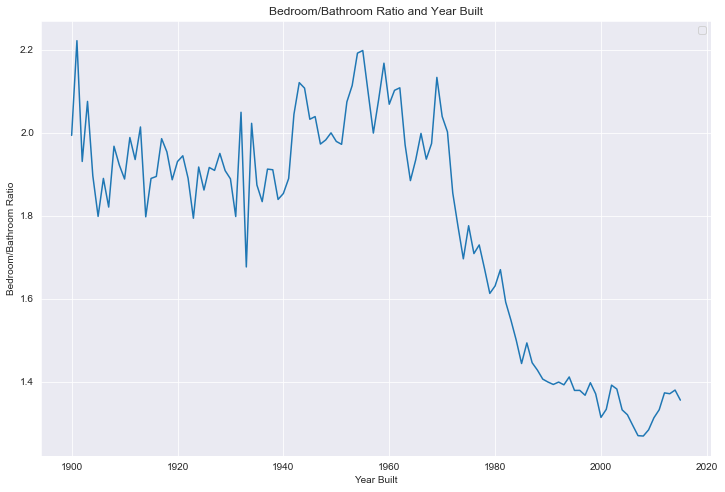

In [90]:
plt.figure(figsize = (12,8))
#sns.set_context("poster")
sns.lineplot(x = 'yr_built', y = 'bed_bath_ratio', data=bed_bath, ci = None)
plt.xlabel('Year Built')
plt.ylabel('Bedroom/Bathroom Ratio')
plt.title('Bedroom/Bathroom Ratio and Year Built')
plt.legend(fancybox=True)
plt.show()

I observed that lower ratios became more prevalent over the years. This would be in part due to houses that contained a high and near identical number of bedrooms and bathrooms. Home buyers that are planning larger families would have to plan accordingly as to what structure they want in their home.

# Question 3 and 4: How do housing prices change based on the age of the house? How did housing sizes evolve over time?

I wanted to observe whether housing prices were affected by the year in which a house was built. I also wanted to observe whether there had been any changes in housing sizes over the years.

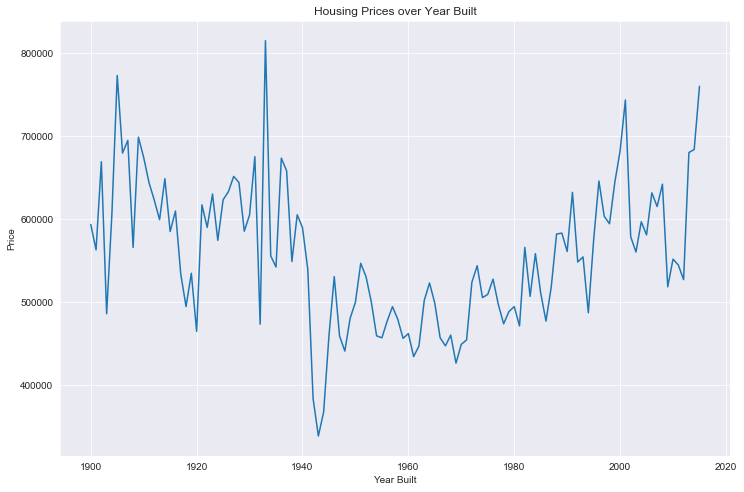

In [91]:
plt.figure(figsize = (12,8))
#sns.set_context("poster")
sns.lineplot(x = 'yr_built', y = 'price', data=bed_bath, ci = None)
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.title('Housing Prices over Year Built')
plt.show()

Housing prices fluctuates greatly according to the year in which a house was built. The highest peaks were observed both in pre-war era houses as well as more recent years. This may correspond to the novelty and historical aspects of a pre-war building as well the more modern designs. A family looking to buy cheaper homes may need to focus on homes built between 1940 and 1990.

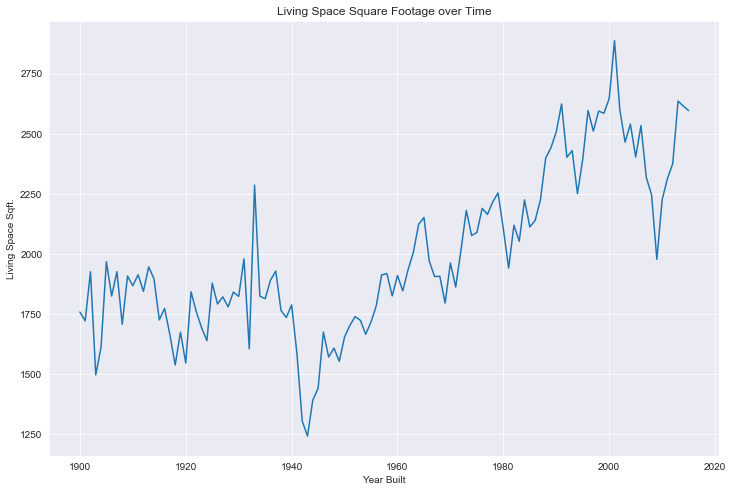

In [92]:
plt.figure(figsize = (12,8))
#sns.set_context("poster")
sns.lineplot(x = 'yr_built', y = 'sqft_living', data=bed_bath, ci = None)
plt.xlabel('Year Built')
plt.ylabel('Living Space Sqft.')
plt.title('Living Space Square Footage over Time')
plt.show()

I observed that the average living space began to increase significantly after the 1940s. This is most likely due to increased homeownership and the concept of investing in one's home being popularized.

# Modeling our Data

## Model 1 - Baseline

My first baseline model consisted of the cleaned dataset prior to dealing with the categorical variables that were non-binary. This was intended as a baseline to simply see how the model functioned as a test-run.

In [93]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21158 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21158 non-null  int64  
 1   price          21158 non-null  float64
 2   bedrooms       21158 non-null  int64  
 3   bathrooms      21158 non-null  float64
 4   sqft_living    21158 non-null  int64  
 5   sqft_lot       21158 non-null  int64  
 6   floors         21158 non-null  float64
 7   waterfront     21158 non-null  int64  
 8   condition      21158 non-null  int64  
 9   grade          21158 non-null  int64  
 10  sqft_above     21158 non-null  int64  
 11  yr_built       21158 non-null  int64  
 12  zipcode        21158 non-null  int64  
 13  lat            21158 non-null  float64
 14  long           21158 non-null  float64
 15  sqft_living15  21158 non-null  int64  
 16  sqft_lot15     21158 non-null  int64  
 17  month_sold     21158 non-null  int64  
 18  is_ren

In [94]:
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
        'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'month_sold', 'is_renovated', 'was_viewed', 'has_basement', 'sqft_yard']

In [95]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=cleaned_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2600.
Date:                Mon, 03 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:20:49   Log-Likelihood:            -2.8844e+05
No. Observations:               21158   AIC:                         5.769e+05
Df Residuals:                   21138   BIC:                         5.771e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.932e+06      3e+06      1.644      0.100   -9.47e+05    1.08e+07
bedrooms      -3.771e+04   2024.163    -18.629      0.000   -4.17e+04   -3.37e+04
bathrooms       4.36e+04   3327.933     13.102      0.000    3.71e+04    5.01e+04
sqft_living     104.9863      4.149     25.302      0.000      96.853     113.119
sqft_lot         52.5579      2.075     25.333      0.000      48.491      56.624
floors         5611.4559   3632.621      1.545      0.122   -1508.758    1.27e+04
waterfront     7.136e+05   1.76e+04     40.514      0.000    6.79e+05    7.48e+05
condition      2.805e+04   2405.326     11.663      0.000    2.33e+04    3.28e+04
grade          1.045e+05   2260.390     46.209      0.000       1e+05    1.09e+05
sqft_above       21.7755      6.840      3.183      0.001       8.368      35.183
yr_built      -2641.9943     73.169    -36.108      0.000   -2785.411   -2498.577
zipcode        -581.8043     33.503    -17.366      0.000    -647.472    -516.137
lat            6.021e+05   1.09e+04     55.433      0.000    5.81e+05    6.23e+05
long          -2.289e+05   1.35e+04    -16.991      0.000   -2.55e+05   -2.03e+05
sqft_living15    18.3690      3.503      5.243      0.000      11.502      25.236
sqft_lot15       -0.3952      0.076     -5.202      0.000      -0.544      -0.246
month_sold    -3045.9467    445.275     -6.841      0.000   -3918.721   -2173.173
is_renovated   4.841e+04   8019.312      6.037      0.000    3.27e+04    6.41e+04
was_viewed     1.128e+05   5248.406     21.485      0.000    1.02e+05    1.23e+05
has_basement  -5917.1425   5312.922     -1.114      0.265   -1.63e+04    4496.590
sqft_yard       -52.4334      2.075    -25.270      0.000     -56.500     -48.366
==============================================================================
Omnibus:                    17881.572   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1790948.497
Skew:                           3.532   Prob(JB):                         0.00
Kurtosis:                      47.515   Cond. No.                     1.58e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.89e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

R-squared value of 0.7 is not the best but it is to be expected with a dataset that has not been fully transformed for linear regression.

In [96]:
# Removing sqft lot 15 due to low coefficients
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors',
        'waterfront', 'condition', 'grade', 'sqft_above','has_basement', 'yr_built',
        'zipcode', 'lat', 'long', 'sqft_living15',
        'month_sold', 'is_renovated', 'was_viewed']

In [97]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=cleaned_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2740.
Date:                Mon, 03 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:20:49   Log-Likelihood:            -2.8845e+05
No. Observations:               21158   AIC:                         5.769e+05
Df Residuals:                   21139   BIC:                         5.771e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.314e+06      3e+06      1.439      0.150   -1.56e+06    1.02e+07
bedrooms       -3.72e+04   2023.056    -18.388      0.000   -4.12e+04   -3.32e+04
bathrooms        4.4e+04   3329.124     13.216      0.000    3.75e+04    5.05e+04
sqft_living     156.6315      6.226     25.157      0.000     144.428     168.835
sqft_lot         -0.0605      0.036     -1.684      0.092      -0.131       0.010
floors         6228.3409   3632.922      1.714      0.086    -892.464    1.33e+04
waterfront     7.124e+05   1.76e+04     40.424      0.000    6.78e+05    7.47e+05
condition      2.792e+04   2406.670     11.601      0.000    2.32e+04    3.26e+04
grade          1.048e+05   2260.929     46.341      0.000       1e+05    1.09e+05
sqft_above       21.5880      6.845      3.154      0.002       8.172      35.004
has_basement  -5790.2040   5316.140     -1.089      0.276   -1.62e+04    4629.836
yr_built      -2645.2626     73.211    -36.132      0.000   -2788.763   -2501.763
zipcode        -583.0205     33.522    -17.392      0.000    -648.727    -517.314
lat            6.033e+05   1.09e+04     55.522      0.000    5.82e+05    6.25e+05
long          -2.345e+05   1.34e+04    -17.451      0.000   -2.61e+05   -2.08e+05
sqft_living15    17.4164      3.501      4.975      0.000      10.555      24.278
month_sold    -3059.2685    445.543     -6.866      0.000   -3932.566   -2185.971
is_renovated   4.804e+04   8023.940      5.987      0.000    3.23e+04    6.38e+04
was_viewed     1.127e+05   5251.639     21.468      0.000    1.02e+05    1.23e+05
==============================================================================
Omnibus:                    17885.026   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1793655.099
Skew:                           3.533   Prob(JB):                         0.00
Kurtosis:                      47.550   Cond. No.                     2.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model did not show much improvement to the R-Squared value even after those removals.

### Checking for Multicolinearity

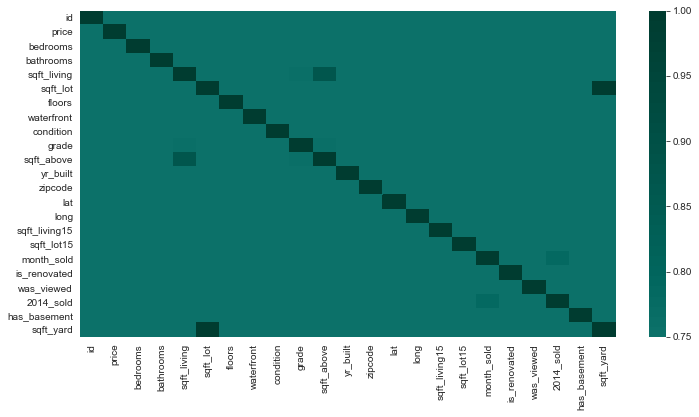

In [98]:
# Creating a seaborn heatmap in order to determine multicolinearity
%matplotlib inline
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(cleaned_data.corr(), center=0, cmap='BrBG',vmin = 0.75)

A number of columns show multi-colinearity with one another due to the high correlations with one another. These columns are sqft_yard with sqft_lot and sqft_above with sqft_living and month_sold and 2014_sold.

In [99]:
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living',
        'waterfront', 'condition', 'grade', 'sqft_lot', 
       'has_basement', 'yr_built', 'zipcode', 'lat', 'long',
        'month_sold', 'is_renovated', 'was_viewed']

In [100]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=cleaned_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     3279.
Date:                Mon, 03 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:20:50   Log-Likelihood:            -2.8847e+05
No. Observations:               21158   AIC:                         5.770e+05
Df Residuals:                   21142   BIC:                         5.771e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.062e+06   2.89e+06      2.101      0.036    4.07e+05    1.17e+07
bedrooms     -3.745e+04   2024.008    -18.500      0.000   -4.14e+04   -3.35e+04
bathrooms     4.536e+04   3195.956     14.192      0.000    3.91e+04    5.16e+04
sqft_living    179.9817      3.194     56.346      0.000     173.721     186.243
waterfront    7.104e+05   1.76e+04     40.282      0.000    6.76e+05    7.45e+05
condition     2.631e+04   2388.762     11.015      0.000    2.16e+04     3.1e+04
grade         1.102e+05   2107.932     52.261      0.000    1.06e+05    1.14e+05
sqft_lot        -0.0681      0.036     -1.902      0.057      -0.138       0.002
has_basement -2.301e+04   3174.563     -7.248      0.000   -2.92e+04   -1.68e+04
yr_built     -2626.4069     71.446    -36.761      0.000   -2766.447   -2486.367
zipcode       -588.1421     33.173    -17.729      0.000    -653.164    -523.120
lat           6.061e+05   1.08e+04     55.971      0.000    5.85e+05    6.27e+05
long         -2.229e+05   1.32e+04    -16.926      0.000   -2.49e+05   -1.97e+05
month_sold   -3050.3906    445.898     -6.841      0.000   -3924.384   -2176.397
is_renovated  4.629e+04   8014.450      5.775      0.000    3.06e+04     6.2e+04
was_viewed    1.146e+05   5158.536     22.216      0.000    1.04e+05    1.25e+05
==============================================================================
Omnibus:                    17600.668   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1674940.712
Skew:                           3.456   Prob(JB):                         0.00
Kurtosis:                      46.037   Cond. No.                     2.07e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

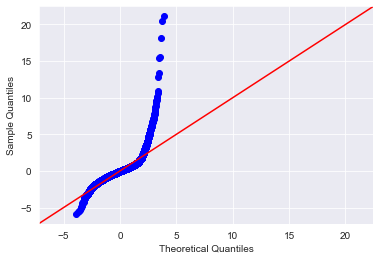

In [101]:
# Checking for normality
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

Poor normality but that was to be expected.

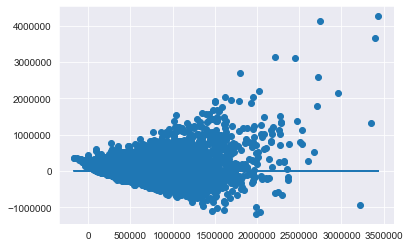

In [102]:
# Checking for Homoscedasticity
plt.scatter(model.predict(cleaned_data[x_cols]), model.resid)
plt.plot(model.predict(cleaned_data[x_cols]), [0 for i in range(len(cleaned_data))])

It's clear that the baseline needs severe work. The following models will make more attempts to improve the model.

## Model 2 OLS Categoricals

For my first practical model, I incorporated all of the categorical variables. I did not transform the continuous variables yet or check for normality in this version until the end.

In [103]:
cleaned_with_dummies.columns

Index(['id', 'price', 'sqft_living', 'sqft_lot', 'waterfront', 'sqft_above',
       'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'is_renovated', 'was_viewed', '2014_sold', 'has_basement',
       'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'bedrooms_1_2', 'bedrooms_3_5', 'bedrooms_6_8', 'grade_average',
       'grade_good', 'grade_excellent', 'sold_quarter_two',
       'sold_quarter_three', 'sold_quarter_four', 'city_Bellevue',
       'city_Burien', 'city_Federal Way', 'city_Issaquah', 'city_Kent',
       'city_Kirkland', 'city_Other', 'city_Renton', 'city_Sammamish',
       'city_Seattle', 'city_Shoreline', 'bathrooms_12', 'bathrooms_23',
       'bathrooms_3over'],
      dtype='object')

In [104]:
# Ensuring there are no stray characters that will interfere with the model
# reading the columns

cleaned_with_dummies.columns = [col.replace(' ', '_') for col in cleaned_with_dummies.columns]
cleaned_with_dummies.columns = [col.replace('-', '_') for col in cleaned_with_dummies.columns]
cleaned_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21158 entries, 0 to 21596
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  21158 non-null  int64  
 1   price               21158 non-null  float64
 2   sqft_living         21158 non-null  int64  
 3   sqft_lot            21158 non-null  int64  
 4   waterfront          21158 non-null  int64  
 5   sqft_above          21158 non-null  int64  
 6   yr_built            21158 non-null  int64  
 7   lat                 21158 non-null  float64
 8   long                21158 non-null  float64
 9   sqft_living15       21158 non-null  int64  
 10  sqft_lot15          21158 non-null  int64  
 11  is_renovated        21158 non-null  int64  
 12  was_viewed          21158 non-null  int64  
 13  2014_sold           21158 non-null  int64  
 14  has_basement        21158 non-null  int64  
 15  condition_2         21158 non-null  int32  
 16  cond

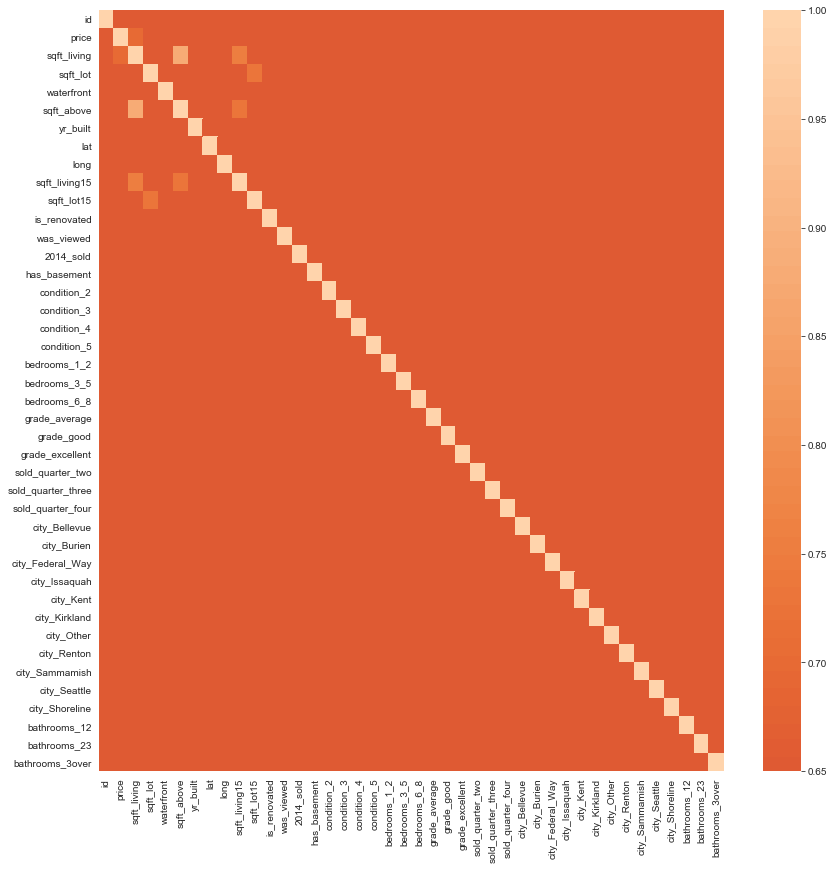

In [105]:
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(cleaned_with_dummies.corr(), center=0, vmin = 0.65, vmax = 1)

In [106]:
model2 = cleaned_with_dummies

In [107]:
model2.drop(columns = ['id','sqft_above','lat','long'], axis = 1, inplace = True)

model2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21158 entries, 0 to 21596
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               21158 non-null  float64
 1   sqft_living         21158 non-null  int64  
 2   sqft_lot            21158 non-null  int64  
 3   waterfront          21158 non-null  int64  
 4   yr_built            21158 non-null  int64  
 5   sqft_living15       21158 non-null  int64  
 6   sqft_lot15          21158 non-null  int64  
 7   is_renovated        21158 non-null  int64  
 8   was_viewed          21158 non-null  int64  
 9   2014_sold           21158 non-null  int64  
 10  has_basement        21158 non-null  int64  
 11  condition_2         21158 non-null  int32  
 12  condition_3         21158 non-null  int32  
 13  condition_4         21158 non-null  int32  
 14  condition_5         21158 non-null  int32  
 15  bedrooms_1_2        21158 non-null  uint8  
 16  bedr

In [108]:
outcome = 'price'
x_cols = list(model2.columns)
x_cols.remove(outcome)
x_cols.remove('2014_sold')

In [109]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=model2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     1460.
Date:                Mon, 03 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:20:53   Log-Likelihood:            -2.8797e+05
No. Observations:               21158   AIC:                         5.760e+05
Df Residuals:                   21121   BIC:                         5.763e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.609e+06    1.6e+05     10.043      0.000    1.29e+06    1.92e+06
sqft_living          175.0677      3.104     56.393      0.000     168.983     181.153
sqft_lot               0.1227      0.049      2.485      0.013       0.026       0.219
waterfront          7.365e+05   1.73e+04     42.633      0.000    7.03e+05     7.7e+05
yr_built           -1077.8650     73.035    -14.758      0.000   -1221.018    -934.712
sqft_living15         59.8434      3.406     17.569      0.000      53.167      66.520
sqft_lot15            -0.3380      0.074     -4.546      0.000      -0.484      -0.192
is_renovated        8.176e+04   7852.250     10.412      0.000    6.64e+04    9.71e+04
was_viewed          8.891e+04   5056.700     17.582      0.000     7.9e+04    9.88e+04
has_basement        -2.77e+04   3175.202     -8.725      0.000   -3.39e+04   -2.15e+04
condition_2         7.977e+04   4.82e+04      1.655      0.098   -1.47e+04    1.74e+05
condition_3         9.047e+04   4.54e+04      1.991      0.046    1402.930     1.8e+05
condition_4         1.195e+05   4.54e+04      2.631      0.009    3.05e+04    2.09e+05
condition_5         1.579e+05   4.56e+04      3.462      0.001    6.85e+04    2.47e+05
bedrooms_1_2        2.287e+05   6.28e+04      3.642      0.000    1.06e+05    3.52e+05
bedrooms_3_5        2.003e+05   6.26e+04      3.200      0.001    7.76e+04    3.23e+05
bedrooms_6_8         1.55e+05   6.34e+04      2.443      0.015    3.06e+04    2.79e+05
grade_average        5.13e+04   5489.774      9.345      0.000    4.05e+04    6.21e+04
grade_good          1.863e+05   7553.884     24.658      0.000    1.71e+05    2.01e+05
grade_excellent     5.753e+05   1.32e+04     43.689      0.000    5.49e+05    6.01e+05
sold_quarter_two     480.2335   3941.863      0.122      0.903   -7246.119    8206.586
sold_quarter_three -1.726e+04   4056.191     -4.256      0.000   -2.52e+04   -9312.535
sold_quarter_four  -1.957e+04   4252.726     -4.603      0.000   -2.79e+04   -1.12e+04
city_Bellevue        3.44e+05   1.02e+04     33.610      0.000    3.24e+05    3.64e+05
city_Burien          6.01e+04   1.43e+04      4.193      0.000     3.2e+04    8.82e+04
city_Federal_Way   -8832.6823   1.12e+04     -0.790      0.429   -3.07e+04    1.31e+04
city_Issaquah       1.807e+05   1.13e+04     15.938      0.000    1.58e+05    2.03e+05
city_Kent           1.605e+04   1.34e+04      1.198      0.231   -1.02e+04    4.23e+04
city_Kirkland       2.699e+05   1.07e+04     25.207      0.000    2.49e+05    2.91e+05
city_Other          1.075e+05   8896.883     12.078      0.000       9e+04    1.25e+05
city_Renton         6.872e+04   1.05e+04      6.553      0.000    4.82e+04    8.93e+04
city_Sammamish      1.421e+05   1.13e+04     12.605      0.000     1.2e+05    1.64e+05
city_Seattle         2.95e+05   9281.2

R-Squared value 0.713 is slightly higher than our previous baseline model. There is an extremely high degree of skewness and kurtosis with my model and there are a number of coefficients with pvalues > 0.05

In [110]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

37 30
['sqft_living', 'sqft_lot', 'waterfront', 'yr_built', 'sqft_living15']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,1.609e+06,1.6e+05,10.043,0.000,1.29e+06,1.92e+06
sqft_living,175.0677,3.104,56.393,0.000,168.983,181.153
sqft_lot,0.1227,0.049,2.485,0.013,0.026,0.219
waterfront,7.365e+05,1.73e+04,42.633,0.000,7.03e+05,7.7e+05
yr_built,-1077.8650,73.035,-14.758,0.000,-1221.018,-934.712


In [111]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=model2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     1751.
Date:                Mon, 03 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:20:53   Log-Likelihood:            -2.8797e+05
No. Observations:               21158   AIC:                         5.760e+05
Df Residuals:                   21127   BIC:                         5.763e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.658e+06   1.41e+05     11.765      0.000    1.38e+06    1.93e+06
sqft_living          175.3737      2.941     59.640      0.000     169.610     181.137
sqft_lot               0.1226      0.049      2.484      0.013       0.026       0.219
waterfront          7.366e+05   1.73e+04     42.639      0.000    7.03e+05     7.7e+05
yr_built           -1067.2372     65.214    -16.365      0.000   -1195.061    -939.413
sqft_living15         59.7312      3.391     17.615      0.000      53.085      66.378
sqft_lot15            -0.3375      0.074     -4.550      0.000      -0.483      -0.192
is_renovated        8.199e+04   7797.481     10.516      0.000    6.67e+04    9.73e+04
was_viewed          8.878e+04   5055.396     17.562      0.000    7.89e+04    9.87e+04
has_basement        -2.77e+04   3136.938     -8.830      0.000   -3.38e+04   -2.15e+04
condition_3         2.018e+04   1.57e+04      1.289      0.198   -1.05e+04    5.09e+04
condition_4         4.927e+04   1.57e+04      3.135      0.002    1.85e+04    8.01e+04
condition_5         8.783e+04   1.63e+04      5.403      0.000     5.6e+04     1.2e+05
bedrooms_1_2        2.284e+05   6.28e+04      3.638      0.000    1.05e+05    3.51e+05
bedrooms_3_5        2.001e+05   6.26e+04      3.197      0.001    7.74e+04    3.23e+05
bedrooms_6_8        1.548e+05   6.34e+04      2.441      0.015    3.05e+04    2.79e+05
grade_average       5.151e+04   5336.351      9.654      0.000    4.11e+04     6.2e+04
grade_good          1.865e+05   7492.864     24.892      0.000    1.72e+05    2.01e+05
grade_excellent     5.752e+05   1.31e+04     43.895      0.000    5.49e+05    6.01e+05
sold_quarter_three -1.758e+04   3221.666     -5.458      0.000   -2.39e+04   -1.13e+04
sold_quarter_four  -1.995e+04   3468.773     -5.750      0.000   -2.67e+04   -1.31e+04
city_Bellevue       3.444e+05   7353.236     46.833      0.000     3.3e+05    3.59e+05
city_Burien          6.08e+04   1.24e+04      4.888      0.000    3.64e+04    8.52e+04
city_Issaquah       1.813e+05   8867.345     20.446      0.000    1.64e+05    1.99e+05
city_Kirkland       2.704e+05   8000.765     33.793      0.000    2.55e+05    2.86e+05
city_Other          1.079e+05   5430.192     19.879      0.000    9.73e+04    1.19e+05
city_Renton         6.924e+04   7747.149      8.938      0.000    5.41e+04    8.44e+04
city_Sammamish      1.427e+05   8793.573     16.228      0.000    1.25e+05     1.6e+05
city_Seattle        2.956e+05   5854.715     50.481      0.000    2.84e+05    3.07e+05
city_Shoreline      1.805e+05   9030.273     19.994      0.000    1.63e+05    1.98e+05
bathrooms_3over     8.192e+04   5904.973     13.872      0.000    7.03e+04    9.35e+04
==============================================================================
Omnibus:                    17606.005   Durbin

In [112]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

31 29
['sqft_living', 'sqft_lot', 'waterfront', 'yr_built', 'sqft_living15']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,1.658e+06,1.41e+05,11.765,0.000,1.38e+06,1.93e+06
sqft_living,175.3737,2.941,59.640,0.000,169.610,181.137
sqft_lot,0.1226,0.049,2.484,0.013,0.026,0.219
waterfront,7.366e+05,1.73e+04,42.639,0.000,7.03e+05,7.7e+05
yr_built,-1067.2372,65.214,-16.365,0.000,-1195.061,-939.413


In [113]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=model2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     1812.
Date:                Mon, 03 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:20:53   Log-Likelihood:            -2.8797e+05
No. Observations:               21158   AIC:                         5.760e+05
Df Residuals:                   21128   BIC:                         5.762e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.665e+06   1.41e+05     11.820      0.000    1.39e+06    1.94e+06
sqft_living          175.4200      2.940     59.659      0.000     169.657     181.183
sqft_lot               0.1215      0.049      2.462      0.014       0.025       0.218
waterfront          7.366e+05   1.73e+04     42.634      0.000    7.03e+05     7.7e+05
yr_built           -1060.6995     65.017    -16.314      0.000   -1188.138    -933.261
sqft_living15         59.7277      3.391     17.614      0.000      53.081      66.374
sqft_lot15            -0.3384      0.074     -4.562      0.000      -0.484      -0.193
is_renovated        8.229e+04   7794.125     10.559      0.000     6.7e+04    9.76e+04
was_viewed          8.884e+04   5055.286     17.573      0.000    7.89e+04    9.87e+04
has_basement       -2.773e+04   3136.857     -8.842      0.000   -3.39e+04   -2.16e+04
condition_4         2.951e+04   3443.431      8.570      0.000    2.28e+04    3.63e+04
condition_5         6.812e+04   5501.335     12.383      0.000    5.73e+04    7.89e+04
bedrooms_1_2        2.281e+05   6.28e+04      3.633      0.000    1.05e+05    3.51e+05
bedrooms_3_5        1.999e+05   6.26e+04      3.194      0.001    7.72e+04    3.23e+05
bedrooms_6_8        1.545e+05   6.34e+04      2.436      0.015    3.02e+04    2.79e+05
grade_average       5.189e+04   5328.639      9.737      0.000    4.14e+04    6.23e+04
grade_good          1.869e+05   7486.753     24.965      0.000    1.72e+05    2.02e+05
grade_excellent     5.756e+05   1.31e+04     43.935      0.000     5.5e+05    6.01e+05
sold_quarter_three -1.751e+04   3221.176     -5.435      0.000   -2.38e+04   -1.12e+04
sold_quarter_four  -1.991e+04   3468.739     -5.741      0.000   -2.67e+04   -1.31e+04
city_Bellevue       3.444e+05   7353.329     46.830      0.000     3.3e+05    3.59e+05
city_Burien         6.064e+04   1.24e+04      4.875      0.000    3.63e+04     8.5e+04
city_Issaquah       1.814e+05   8867.337     20.453      0.000    1.64e+05    1.99e+05
city_Kirkland       2.704e+05   8000.841     33.797      0.000    2.55e+05    2.86e+05
city_Other           1.08e+05   5430.122     19.889      0.000    9.74e+04    1.19e+05
city_Renton         6.924e+04   7747.268      8.937      0.000    5.41e+04    8.44e+04
city_Sammamish      1.427e+05   8793.669     16.232      0.000    1.26e+05     1.6e+05
city_Seattle        2.957e+05   5852.896     50.530      0.000    2.84e+05    3.07e+05
city_Shoreline      1.807e+05   9029.300     20.016      0.000    1.63e+05    1.98e+05
bathrooms_3over     8.191e+04   5905.064     13.871      0.000    7.03e+04    9.35e+04
==============================================================================
Omnibus:                    17600.105   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (J

In [114]:
X = model2[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('sqft_living', 24.585683053112884),
 ('sqft_lot', 2.4889570108966694),
 ('waterfront', 1.0887794473764036),
 ('yr_built', 1800.0289118301578),
 ('sqft_living15', 27.7847657937613),
 ('sqft_lot15', 2.70455462351197),
 ('is_renovated', 1.079772137603903),
 ('was_viewed', 1.36722038937033),
 ('has_basement', 2.1076442610935353),
 ('condition_4', 1.5311961259463893),
 ('condition_5', 1.1939013274571477),
 ('bedrooms_1_2', 229.8461620997083),
 ('bedrooms_3_5', 1502.646441153813),
 ('bedrooms_6_8', 26.642133296451703),
 ('grade_average', 10.30999734407079),
 ('grade_good', 5.043771992993176),
 ('grade_excellent', 2.1544988457174687),
 ('sold_quarter_three', 1.543547005452159),
 ('sold_quarter_four', 1.4349185028996942),
 ('city_Bellevue', 1.924328190217895),
 ('city_Burien', 1.1932642033900858),
 ('city_Issaquah', 1.4623920917800477),
 ('city_Kirkland', 1.5937368297921193),
 ('city_Other', 5.2357907651885),
 ('city_Renton', 1.6621184283263224),
 ('city_Sammamish', 1.5707427674583188),
 ('c

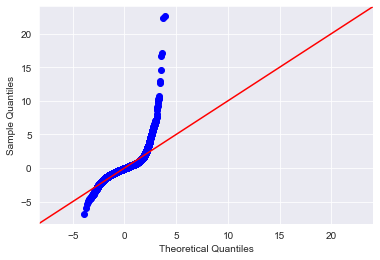

In [115]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

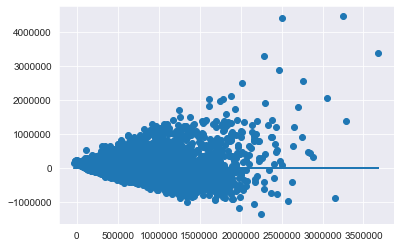

In [116]:
plt.scatter(model.predict(model2[x_cols]), model.resid)
plt.plot(model.predict(model2[x_cols]), [0 for i in range(len(cleaned_data))])

Lack of normality as shown by the QQ Plot indicates that the data needs to be transformed further.

This model was an improvement over the baseline model but it indicates that the dataset needs to be manipulated further.

## Model 3 - OLS with Log Transform

This model incorporated log transformations and feature scaling to our continuous data.

In [117]:
cleaned_with_dummies.columns
model3 = cleaned_with_dummies

In [118]:
model3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21158 entries, 0 to 21596
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               21158 non-null  float64
 1   sqft_living         21158 non-null  int64  
 2   sqft_lot            21158 non-null  int64  
 3   waterfront          21158 non-null  int64  
 4   yr_built            21158 non-null  int64  
 5   sqft_living15       21158 non-null  int64  
 6   sqft_lot15          21158 non-null  int64  
 7   is_renovated        21158 non-null  int64  
 8   was_viewed          21158 non-null  int64  
 9   2014_sold           21158 non-null  int64  
 10  has_basement        21158 non-null  int64  
 11  condition_2         21158 non-null  int32  
 12  condition_3         21158 non-null  int32  
 13  condition_4         21158 non-null  int32  
 14  condition_5         21158 non-null  int32  
 15  bedrooms_1_2        21158 non-null  uint8  
 16  bedr

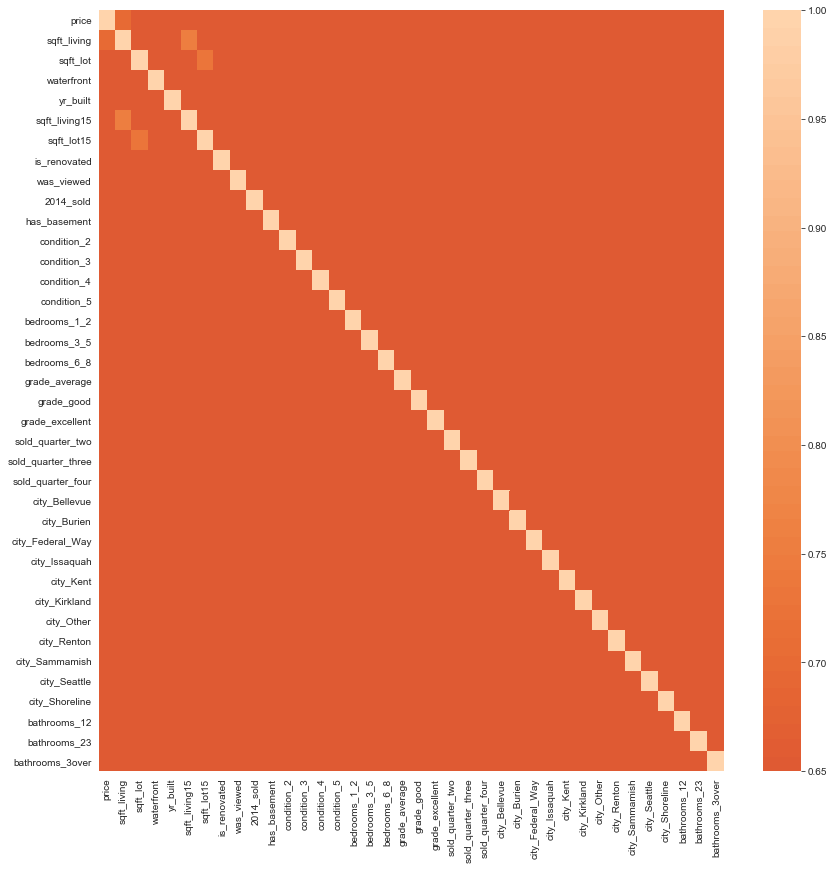

In [119]:
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(model3.corr(), center=0, vmin = 0.65)

In [120]:
# Produces a dataframe consisting of all the variable pairs that have a correlation
# higher than 0.65
corr_df = model3.corr().abs().stack().reset_index().sort_values(0, ascending=False)

corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))

corr_df.set_index(['pairs'], inplace = True)

corr_df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
corr_df.columns = ['cc']

corr_df.drop_duplicates(inplace=True)

corr_df[(corr_df.cc>.65) & (corr_df.cc<1)]

,cc
pairs,
"(bedrooms_1_2, bedrooms_3_5)",0.937720
"(condition_3, condition_4)",0.815963
"(sqft_living15, sqft_living)",0.755148
"(sqft_lot15, sqft_lot)",0.733109
"(grade_good, grade_average)",0.716985
"(sqft_living, price)",0.699240


In [121]:
model3.drop(columns = ['sqft_lot15','sqft_living15'], axis = 1, inplace = True)
model3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21158 entries, 0 to 21596
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               21158 non-null  float64
 1   sqft_living         21158 non-null  int64  
 2   sqft_lot            21158 non-null  int64  
 3   waterfront          21158 non-null  int64  
 4   yr_built            21158 non-null  int64  
 5   is_renovated        21158 non-null  int64  
 6   was_viewed          21158 non-null  int64  
 7   2014_sold           21158 non-null  int64  
 8   has_basement        21158 non-null  int64  
 9   condition_2         21158 non-null  int32  
 10  condition_3         21158 non-null  int32  
 11  condition_4         21158 non-null  int32  
 12  condition_5         21158 non-null  int32  
 13  bedrooms_1_2        21158 non-null  uint8  
 14  bedrooms_3_5        21158 non-null  uint8  
 15  bedrooms_6_8        21158 non-null  uint8  
 16  grad

In [122]:
continuous_var = ['price', 'sqft_living', 'sqft_lot', 'yr_built']

In [123]:
#import scipy.stats as stats
#z_scores = stats.zscore(model3)

#abs_z_scores = np.abs(z_scores)
#filtered_entries = (abs_z_scores < 3).all(axis=1)
#model3 = model3[filtered_entries]

for col in continuous_var:
    model3.drop(model3.loc[np.abs(stats.zscore(model3[col]))>3].index, axis=0, inplace=True)
model3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20241 entries, 0 to 21596
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               20241 non-null  float64
 1   sqft_living         20241 non-null  int64  
 2   sqft_lot            20241 non-null  int64  
 3   waterfront          20241 non-null  int64  
 4   yr_built            20241 non-null  int64  
 5   is_renovated        20241 non-null  int64  
 6   was_viewed          20241 non-null  int64  
 7   2014_sold           20241 non-null  int64  
 8   has_basement        20241 non-null  int64  
 9   condition_2         20241 non-null  int32  
 10  condition_3         20241 non-null  int32  
 11  condition_4         20241 non-null  int32  
 12  condition_5         20241 non-null  int32  
 13  bedrooms_1_2        20241 non-null  uint8  
 14  bedrooms_3_5        20241 non-null  uint8  
 15  bedrooms_6_8        20241 non-null  uint8  
 16  grad

Roughly ten thousand houses were removed from the dataset because they were designated outliers by their z-score.

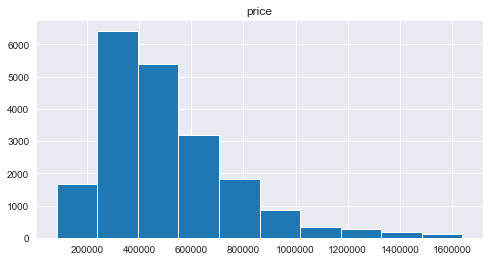

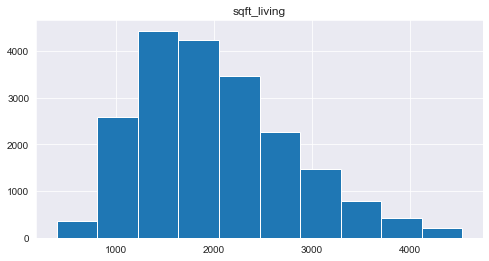

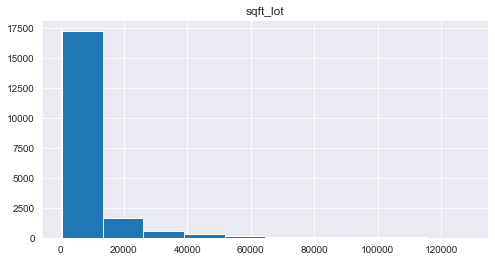

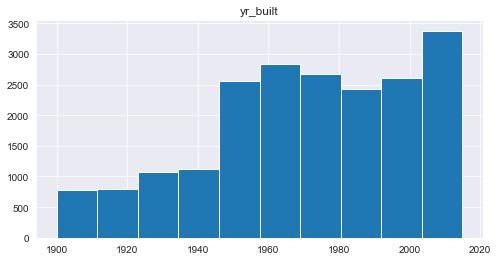

In [124]:
for col in continuous_var:
    plt.figure(figsize = (8,4))
    plt.hist(model3[col])
    plt.title(col)
    plt.show()

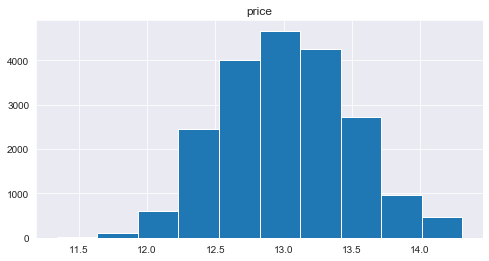

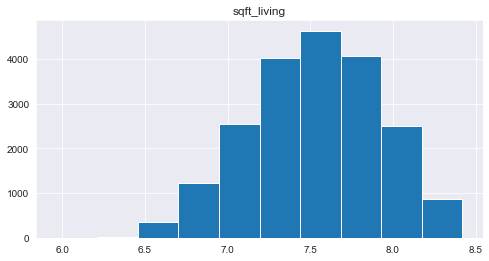

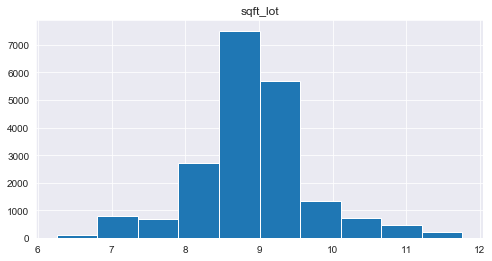

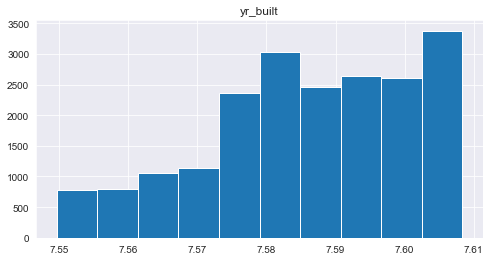

In [125]:
# Perform log transformation and standardization all the continuous variables
#continuous_var.remove('price')
for var in continuous_var:
    model3[var] = model3[var].map(lambda x: np.log(x))
for col in continuous_var:
    plt.figure(figsize = (8,4))
    plt.hist(model3[col])
    plt.title(col)
    plt.show()

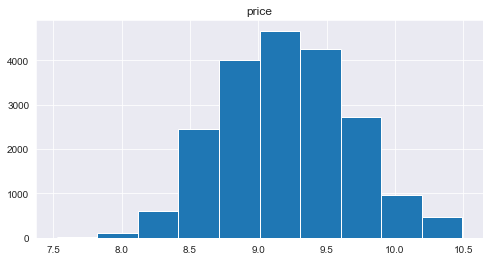

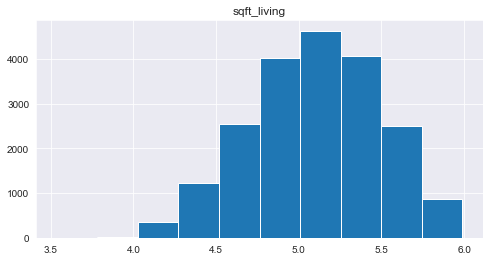

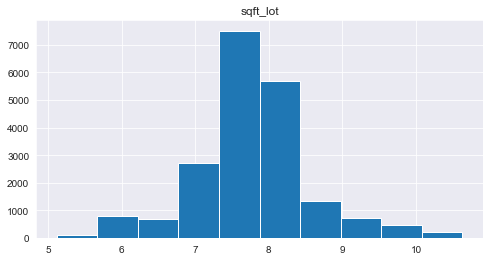

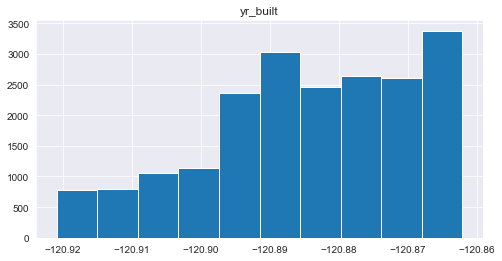

In [126]:
for var in continuous_var:
    model3[var] = (model3[var] - min(model3[var]) 
                    / (max(model3[var]) - min(model3[var])))
for col in continuous_var:
    plt.figure(figsize = (8,4))
    plt.hist(model3[col])
    plt.title(col)
    plt.show()

In [127]:
model3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20241 entries, 0 to 21596
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               20241 non-null  float64
 1   sqft_living         20241 non-null  float64
 2   sqft_lot            20241 non-null  float64
 3   waterfront          20241 non-null  int64  
 4   yr_built            20241 non-null  float64
 5   is_renovated        20241 non-null  int64  
 6   was_viewed          20241 non-null  int64  
 7   2014_sold           20241 non-null  int64  
 8   has_basement        20241 non-null  int64  
 9   condition_2         20241 non-null  int32  
 10  condition_3         20241 non-null  int32  
 11  condition_4         20241 non-null  int32  
 12  condition_5         20241 non-null  int32  
 13  bedrooms_1_2        20241 non-null  uint8  
 14  bedrooms_3_5        20241 non-null  uint8  
 15  bedrooms_6_8        20241 non-null  uint8  
 16  grad

In [128]:
outcome = 'price'
x_cols = list(model3.columns)
x_cols.remove(outcome)
x_cols.remove('2014_sold')
x_cols

['sqft_living',
 'sqft_lot',
 'waterfront',
 'yr_built',
 'is_renovated',
 'was_viewed',
 'has_basement',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'bedrooms_1_2',
 'bedrooms_3_5',
 'bedrooms_6_8',
 'grade_average',
 'grade_good',
 'grade_excellent',
 'sold_quarter_two',
 'sold_quarter_three',
 'sold_quarter_four',
 'city_Bellevue',
 'city_Burien',
 'city_Federal_Way',
 'city_Issaquah',
 'city_Kent',
 'city_Kirkland',
 'city_Other',
 'city_Renton',
 'city_Sammamish',
 'city_Seattle',
 'city_Shoreline',
 'bathrooms_12',
 'bathrooms_23',
 'bathrooms_3over']

In [129]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=model3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     1467.
Date:                Mon, 03 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:21:02   Log-Likelihood:                -818.57
No. Observations:               20241   AIC:                             1707.
Df Residuals:                   20206   BIC:                             1984.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -413.8152     23.386    -17.695      0.000    -459.653    -367.977
sqft_living            0.5693      0.009     66.364      0.000       0.552       0.586
sqft_lot               0.0185      0.003      6.029      0.000       0.012       0.024
waterfront             0.4465      0.031     14.597      0.000       0.387       0.506
yr_built              -3.4649      0.193    -17.908      0.000      -3.844      -3.086
is_renovated           0.0528      0.010      5.036      0.000       0.032       0.073
was_viewed             0.1369      0.007     20.149      0.000       0.124       0.150
has_basement          -0.0521      0.004    -12.476      0.000      -0.060      -0.044
condition_2            0.0773      0.063      1.221      0.222      -0.047       0.201
condition_3            0.2125      0.060      3.563      0.000       0.096       0.329
condition_4            0.2500      0.060      4.192      0.000       0.133       0.367
condition_5            0.2901      0.060      4.844      0.000       0.173       0.407
bedrooms_1_2           0.2608      0.090      2.908      0.004       0.085       0.437
bedrooms_3_5           0.1780      0.089      1.990      0.047       0.003       0.353
bedrooms_6_8           0.0672      0.091      0.742      0.458      -0.110       0.245
grade_average          0.1773      0.007     24.910      0.000       0.163       0.191
grade_good             0.4385      0.010     45.218      0.000       0.419       0.458
grade_excellent        0.6285      0.020     30.805      0.000       0.589       0.668
sold_quarter_two       0.0091      0.005      1.764      0.078      -0.001       0.019
sold_quarter_three    -0.0220      0.005     -4.152      0.000      -0.032      -0.012
sold_quarter_four     -0.0316      0.006     -5.686      0.000      -0.043      -0.021
city_Bellevue          0.7171      0.014     53.102      0.000       0.691       0.744
city_Burien            0.2743      0.019     14.720      0.000       0.238       0.311
city_Federal_Way      -0.0010      0.015     -0.067      0.947      -0.029       0.028
city_Issaquah          0.5488      0.015     36.827      0.000       0.520       0.578
city_Kent              0.0244      0.017      1.400      0.161      -0.010       0.058
city_Kirkland          0.6190      0.014     44.135      0.000       0.591       0.646
city_Other             0.2885      0.012     24.619      0.000       0.265       0.311
city_Renton            0.2802      0.014     20.464      0.000       0.253       0.307
city_Sammamish         0.5415      0.015     36.693      0.000       0.513       0.570
city_Seattle           0.6654      0.012     53.496      0.000       0.641       0.690
city_Shoreline         0.4744      0.015     31.518      0.000       0.445       0.504
bathrooms_12           0.0345      0.0

In [130]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

35 29
['sqft_living', 'sqft_lot', 'waterfront', 'yr_built', 'is_renovated']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,-413.8152,23.386,-17.695,0.0,-459.653,-367.977
sqft_living,0.5693,0.009,66.364,0.0,0.552,0.586
sqft_lot,0.0185,0.003,6.029,0.0,0.012,0.024
waterfront,0.4465,0.031,14.597,0.0,0.387,0.506
yr_built,-3.4649,0.193,-17.908,0.0,-3.844,-3.086


In [131]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=model3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     1719.
Date:                Mon, 03 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:21:02   Log-Likelihood:                -822.51
No. Observations:               20241   AIC:                             1705.
Df Residuals:                   20211   BIC:                             1942.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -413.0612     23.366    -17.678      0.000    -458.860    -367.262
sqft_living            0.5691      0.009     66.368      0.000       0.552       0.586
sqft_lot               0.0185      0.003      6.051      0.000       0.013       0.025
waterfront             0.4467      0.031     14.603      0.000       0.387       0.507
yr_built              -3.4598      0.193    -17.895      0.000      -3.839      -3.081
is_renovated           0.0528      0.010      5.032      0.000       0.032       0.073
was_viewed             0.1367      0.007     20.125      0.000       0.123       0.150
has_basement          -0.0519      0.004    -12.468      0.000      -0.060      -0.044
condition_3            0.1451      0.021      7.020      0.000       0.105       0.186
condition_4            0.1827      0.021      8.815      0.000       0.142       0.223
condition_5            0.2230      0.021     10.394      0.000       0.181       0.265
bedrooms_1_2           0.1960      0.017     11.443      0.000       0.162       0.230
bedrooms_3_5           0.1131      0.016      7.122      0.000       0.082       0.144
grade_average          0.1777      0.007     24.976      0.000       0.164       0.192
grade_good             0.4390      0.010     45.285      0.000       0.420       0.458
grade_excellent        0.6292      0.020     30.847      0.000       0.589       0.669
sold_quarter_three    -0.0277      0.004     -6.581      0.000      -0.036      -0.019
sold_quarter_four     -0.0373      0.005     -8.230      0.000      -0.046      -0.028
city_Bellevue          0.7121      0.010     73.467      0.000       0.693       0.731
city_Burien            0.2697      0.016     16.780      0.000       0.238       0.301
city_Issaquah          0.5441      0.012     46.950      0.000       0.521       0.567
city_Kirkland          0.6141      0.010     59.033      0.000       0.594       0.634
city_Other             0.2837      0.007     40.261      0.000       0.270       0.298
city_Renton            0.2755      0.010     27.502      0.000       0.256       0.295
city_Sammamish         0.5369      0.011     46.940      0.000       0.514       0.559
city_Seattle           0.6608      0.008     82.298      0.000       0.645       0.677
city_Shoreline         0.4695      0.012     40.086      0.000       0.447       0.493
bathrooms_12           0.0346      0.006      5.374      0.000       0.022       0.047
bathrooms_23           0.0995      0.008     12.411      0.000       0.084       0.115
bathrooms_3over        0.1670      0.012     14.303      0.000       0.144       0.190
==============================================================================
Omnibus:                      288.627   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (J

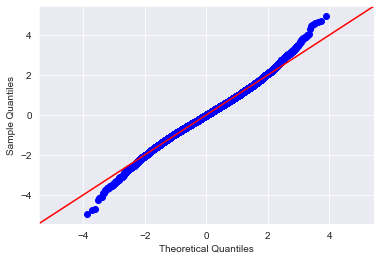

In [132]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

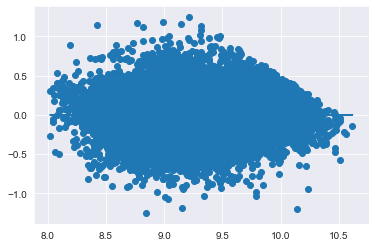

In [133]:
plt.scatter(model.predict(model3[x_cols]), model.resid)
plt.plot(model.predict(model3[x_cols]), [0 for i in range(len(model3))])

The QQ Plot shows a higher degree of normalcy than what I have seen previously.

In [134]:
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, model3['price'].quantile(q=q)))

0.9 percentile: 9.814784187908408
0.91 percentile: 9.838566521626333
0.92 percentile: 9.870711629928126
0.93 percentile: 9.904453281387587
0.94 percentile: 9.942703895472645
0.95 percentile: 9.983780290105214
0.96 percentile: 10.048699836204529
0.97 percentile: 10.130937934441501
0.98 percentile: 10.223053223349307


In [135]:
for i in range(0, 10):
    q = i / 100
    print('{} percentile: {}'.format(q, model3['price'].quantile(q=q)))

0.0 percentile: 7.522971191896273
0.01 percentile: 8.186517620799634
0.02 percentile: 8.309803856533541
0.03 percentile: 8.385459217777452
0.04 percentile: 8.427285732723712
0.05 percentile: 8.462792421180623
0.06 percentile: 8.503800444908
0.07 percentile: 8.530233701976156
0.08 percentile: 8.55598619807857
0.09 percentile: 8.587271335575604


In [136]:
subset = model3[model3['price'] < 10.049]
print('Percent removed:',(len(model3) - len(subset))/len(model3))
outcome = 'price'
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=subset).fit()
model.summary()

Percent removed: 0.038189812756286745


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1411.
Date:                Mon, 03 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:21:04   Log-Likelihood:                -112.61
No. Observations:               19468   AIC:                             285.2
Df Residuals:                   19438   BIC:                             521.5
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -362.2534     23.314    -15.538      0.000    -407.951    -316.556
sqft_living            0.5460      0.008     64.871      0.000       0.530       0.563
sqft_lot               0.0198      0.003      6.593      0.000       0.014       0.026
waterfront             0.3845      0.038     10.247      0.000       0.311       0.458
yr_built              -3.0404      0.193    -15.761      0.000      -3.419      -2.662
is_renovated           0.0419      0.011      3.918      0.000       0.021       0.063
was_viewed             0.1163      0.007     16.481      0.000       0.102       0.130
has_basement          -0.0514      0.004    -12.546      0.000      -0.059      -0.043
condition_3            0.1602      0.020      7.972      0.000       0.121       0.200
condition_4            0.1926      0.020      9.558      0.000       0.153       0.232
condition_5            0.2277      0.021     10.895      0.000       0.187       0.269
bedrooms_1_2           0.1854      0.017     10.777      0.000       0.152       0.219
bedrooms_3_5           0.1052      0.016      6.571      0.000       0.074       0.137
grade_average          0.1770      0.007     25.702      0.000       0.164       0.191
grade_good             0.4039      0.010     42.202      0.000       0.385       0.423
grade_excellent        0.5415      0.027     19.873      0.000       0.488       0.595
sold_quarter_three    -0.0220      0.004     -5.305      0.000      -0.030      -0.014
sold_quarter_four     -0.0373      0.004     -8.336      0.000      -0.046      -0.029
city_Bellevue          0.6945      0.010     71.484      0.000       0.676       0.714
city_Burien            0.2728      0.016     17.462      0.000       0.242       0.303
city_Issaquah          0.5549      0.011     49.279      0.000       0.533       0.577
city_Kirkland          0.6015      0.010     58.632      0.000       0.581       0.622
city_Other             0.2757      0.007     40.410      0.000       0.262       0.289
city_Renton            0.2769      0.010     28.495      0.000       0.258       0.296
city_Sammamish         0.5558      0.011     49.509      0.000       0.534       0.578
city_Seattle           0.6505      0.008     83.200      0.000       0.635       0.666
city_Shoreline         0.4654      0.011     40.763      0.000       0.443       0.488
bathrooms_12           0.0350      0.006      5.598      0.000       0.023       0.047
bathrooms_23           0.0959      0.008     12.244      0.000       0.081       0.111
bathrooms_3over        0.1322      0.012     11.214      0.000       0.109       0.155
==============================================================================
Omnibus:                      237.609   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (J

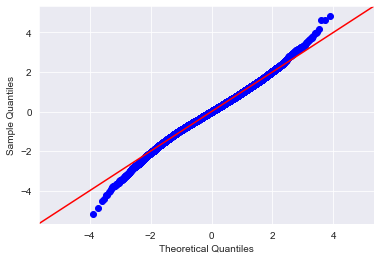

In [137]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

We note that the data looks more normalized except around the tails of the residuals. This is indicated to us by the kurtosis measurement above as well.

## Model 4 - Train Test Split

For my final attempt at creating a model, I decided to split the dataset into two subsets in order to perform a train-test split. For this, I would build a model against the training subset and then compare its results for both subsets. 

In [138]:
outcome = 'price'
x_cols = list(model3.columns)
x_cols.remove(outcome)
x_cols.remove('2014_sold')

In [139]:
train, test = train_test_split(model3)

In [140]:
print(len(train), len(test))
train.head()

15180 5061


,price,sqft_living,sqft_lot,waterfront,yr_built,is_renovated,was_viewed,2014_sold,has_basement,condition_2,...,city_Kent,city_Kirkland,city_Other,city_Renton,city_Sammamish,city_Seattle,city_Shoreline,bathrooms_12,bathrooms_23,bathrooms_3over
8478,9.943339,5.954142,8.475770,0,-120.868107,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
11261,9.169797,4.241371,7.659802,0,-120.895437,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
13811,8.703456,4.739457,8.038446,0,-120.878142,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
14456,9.361251,5.499544,7.825060,0,-120.886752,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2550,8.838358,5.377254,8.106816,0,-120.873112,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [141]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     1103.
Date:                Mon, 03 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:21:04   Log-Likelihood:                -571.49
No. Observations:               15180   AIC:                             1213.
Df Residuals:                   15145   BIC:                             1480.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -421.6623     27.021    -15.605      0.000    -474.626    -368.699
sqft_living            0.5733      0.010     58.078      0.000       0.554       0.593
sqft_lot               0.0175      0.004      4.960      0.000       0.011       0.024
waterfront             0.4543      0.034     13.442      0.000       0.388       0.521
yr_built              -3.5296      0.224    -15.789      0.000      -3.968      -3.091
is_renovated           0.0489      0.012      4.040      0.000       0.025       0.073
was_viewed             0.1383      0.008     17.620      0.000       0.123       0.154
has_basement          -0.0530      0.005    -11.031      0.000      -0.062      -0.044
condition_2            0.0882      0.077      1.146      0.252      -0.063       0.239
condition_3            0.2355      0.073      3.232      0.001       0.093       0.378
condition_4            0.2700      0.073      3.706      0.000       0.127       0.413
condition_5            0.3100      0.073      4.240      0.000       0.167       0.453
bedrooms_1_2           0.2581      0.096      2.695      0.007       0.070       0.446
bedrooms_3_5           0.1708      0.095      1.789      0.074      -0.016       0.358
bedrooms_6_8           0.0520      0.097      0.537      0.591      -0.138       0.242
grade_average          0.1773      0.008     21.400      0.000       0.161       0.194
grade_good             0.4426      0.011     39.420      0.000       0.421       0.465
grade_excellent        0.6422      0.023     27.683      0.000       0.597       0.688
sold_quarter_two       0.0093      0.006      1.576      0.115      -0.002       0.021
sold_quarter_three    -0.0230      0.006     -3.775      0.000      -0.035      -0.011
sold_quarter_four     -0.0349      0.006     -5.448      0.000      -0.047      -0.022
city_Bellevue          0.7113      0.016     44.999      0.000       0.680       0.742
city_Burien            0.2606      0.022     12.020      0.000       0.218       0.303
city_Federal_Way      -0.0048      0.017     -0.284      0.776      -0.038       0.028
city_Issaquah          0.5420      0.017     31.351      0.000       0.508       0.576
city_Kent              0.0142      0.020      0.702      0.483      -0.025       0.054
city_Kirkland          0.6073      0.017     36.790      0.000       0.575       0.640
city_Other             0.2763      0.014     20.013      0.000       0.249       0.303
city_Renton            0.2668      0.016     16.694      0.000       0.235       0.298
city_Sammamish         0.5299      0.017     30.653      0.000       0.496       0.564
city_Seattle           0.6557      0.015     44.801      0.000       0.627       0.684
city_Shoreline         0.4667      0.018     26.568      0.000       0.432       0.501
bathrooms_12           0.0310      0.0

In [142]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

35 28
['sqft_living', 'sqft_lot', 'waterfront', 'yr_built', 'is_renovated']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,-421.6623,27.021,-15.605,0.0,-474.626,-368.699
sqft_living,0.5733,0.010,58.078,0.0,0.554,0.593
sqft_lot,0.0175,0.004,4.960,0.0,0.011,0.024
waterfront,0.4543,0.034,13.442,0.0,0.388,0.521
yr_built,-3.5296,0.224,-15.789,0.0,-3.968,-3.091


In [143]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     1333.
Date:                Mon, 03 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:21:04   Log-Likelihood:                -596.95
No. Observations:               15180   AIC:                             1252.
Df Residuals:                   15151   BIC:                             1473.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -409.7200     26.972    -15.191      0.000    -462.588    -356.852
sqft_living            0.5658      0.010     57.621      0.000       0.547       0.585
sqft_lot               0.0175      0.004      4.955      0.000       0.011       0.024
waterfront             0.4549      0.034     13.439      0.000       0.389       0.521
yr_built              -3.4332      0.223    -15.382      0.000      -3.871      -2.996
is_renovated           0.0482      0.012      3.981      0.000       0.024       0.072
was_viewed             0.1388      0.008     17.665      0.000       0.123       0.154
has_basement          -0.0525      0.005    -10.950      0.000      -0.062      -0.043
condition_3            0.1599      0.024      6.632      0.000       0.113       0.207
condition_4            0.1946      0.024      8.040      0.000       0.147       0.242
condition_5            0.2361      0.025      9.426      0.000       0.187       0.285
bedrooms_1_2           0.0868      0.007     12.103      0.000       0.073       0.101
grade_average          0.1783      0.008     21.499      0.000       0.162       0.195
grade_good             0.4478      0.011     39.930      0.000       0.426       0.470
grade_excellent        0.6517      0.023     28.105      0.000       0.606       0.697
sold_quarter_three    -0.0285      0.005     -5.870      0.000      -0.038      -0.019
sold_quarter_four     -0.0402      0.005     -7.660      0.000      -0.051      -0.030
city_Bellevue          0.7101      0.011     63.557      0.000       0.688       0.732
city_Burien            0.2605      0.019     14.019      0.000       0.224       0.297
city_Issaquah          0.5428      0.013     41.035      0.000       0.517       0.569
city_Kirkland          0.6069      0.012     49.969      0.000       0.583       0.631
city_Other             0.2767      0.008     33.921      0.000       0.261       0.293
city_Renton            0.2668      0.011     23.223      0.000       0.244       0.289
city_Sammamish         0.5314      0.013     40.082      0.000       0.505       0.557
city_Seattle           0.6548      0.009     70.425      0.000       0.637       0.673
city_Shoreline         0.4660      0.014     34.484      0.000       0.440       0.492
bathrooms_12           0.0318      0.007      4.266      0.000       0.017       0.046
bathrooms_23           0.0946      0.009     10.207      0.000       0.076       0.113
bathrooms_3over        0.1441      0.013     10.743      0.000       0.118       0.170
==============================================================================
Omnibus:                      210.594   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              389.057
Skew:                           0.041   Prob(JB):             

In [144]:
x_cols

['sqft_living',
 'sqft_lot',
 'waterfront',
 'yr_built',
 'is_renovated',
 'was_viewed',
 'has_basement',
 'condition_3',
 'condition_4',
 'condition_5',
 'bedrooms_1_2',
 'grade_average',
 'grade_good',
 'grade_excellent',
 'sold_quarter_three',
 'sold_quarter_four',
 'city_Bellevue',
 'city_Burien',
 'city_Issaquah',
 'city_Kirkland',
 'city_Other',
 'city_Renton',
 'city_Sammamish',
 'city_Seattle',
 'city_Shoreline',
 'bathrooms_12',
 'bathrooms_23',
 'bathrooms_3over']

In [145]:
# Removing columns in which coefficient is less than 0.1 and running new model
x_cols.remove('sqft_lot')
x_cols.remove('bedrooms_1_2')
x_cols.remove('is_renovated')
x_cols.remove('has_basement')
x_cols.remove('sold_quarter_three')
x_cols.remove('sold_quarter_four')
x_cols.remove('bathrooms_12')
x_cols.remove('bathrooms_23')
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     1785.
Date:                Mon, 03 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:21:05   Log-Likelihood:                -839.82
No. Observations:               15180   AIC:                             1722.
Df Residuals:                   15159   BIC:                             1882.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -322.4931     22.626    -14.253      0.000    -366.844    -278.143
sqft_living         0.5715      0.007     77.837      0.000       0.557       0.586
waterfront          0.4877      0.034     14.235      0.000       0.421       0.555
yr_built           -2.7129      0.187    -14.496      0.000      -3.080      -2.346
was_viewed          0.1368      0.008     17.277      0.000       0.121       0.152
condition_3         0.1579      0.024      6.458      0.000       0.110       0.206
condition_4         0.1846      0.025      7.517      0.000       0.136       0.233
condition_5         0.2248      0.025      8.860      0.000       0.175       0.274
grade_average       0.1684      0.008     20.514      0.000       0.152       0.184
grade_good          0.4609      0.011     40.772      0.000       0.439       0.483
grade_excellent     0.6770      0.023     28.961      0.000       0.631       0.723
city_Bellevue       0.7098      0.011     62.632      0.000       0.688       0.732
city_Burien         0.2582      0.019     13.684      0.000       0.221       0.295
city_Issaquah       0.5528      0.013     41.269      0.000       0.527       0.579
city_Kirkland       0.6024      0.012     48.887      0.000       0.578       0.627
city_Other          0.2851      0.008     34.488      0.000       0.269       0.301
city_Renton         0.2722      0.012     23.363      0.000       0.249       0.295
city_Sammamish      0.5436      0.013     40.444      0.000       0.517       0.570
city_Seattle        0.6441      0.009     74.103      0.000       0.627       0.661
city_Shoreline      0.4577      0.014     33.432      0.000       0.431       0.485
bathrooms_3over     0.0425      0.009      4.636      0.000       0.025       0.060
==============================================================================
Omnibus:                      182.995   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.971
Skew:                           0.059   Prob(JB):                     2.44e-69
Kurtosis:                       3.697   Cond. No.                     1.32e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

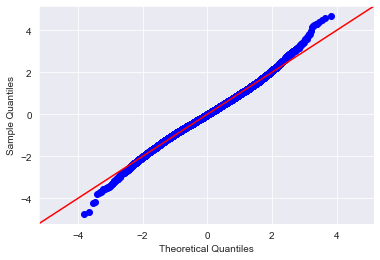

In [146]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [147]:
# Now to test the model against the test data
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     595.6
Date:                Mon, 03 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:21:05   Log-Likelihood:                -307.53
No. Observations:                5061   AIC:                             657.1
Df Residuals:                    5040   BIC:                             794.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -299.0715     39.700     -7.533      0.000    -376.901    -221.242
sqft_living         0.5785      0.013     45.292      0.000       0.553       0.604
waterfront          0.4736      0.073      6.503      0.000       0.331       0.616
yr_built           -2.5191      0.328     -7.672      0.000      -3.163      -1.875
was_viewed          0.1355      0.014      9.885      0.000       0.109       0.162
condition_3         0.1050      0.041      2.571      0.010       0.025       0.185
condition_4         0.1431      0.041      3.495      0.000       0.063       0.223
condition_5         0.1829      0.042      4.318      0.000       0.100       0.266
grade_average       0.1800      0.014     13.032      0.000       0.153       0.207
grade_good          0.4514      0.019     23.337      0.000       0.413       0.489
grade_excellent     0.6169      0.043     14.203      0.000       0.532       0.702
city_Bellevue       0.7199      0.020     36.295      0.000       0.681       0.759
city_Burien         0.2975      0.033      9.115      0.000       0.234       0.361
city_Issaquah       0.5568      0.025     22.691      0.000       0.509       0.605
city_Kirkland       0.6298      0.021     30.700      0.000       0.590       0.670
city_Other          0.3187      0.014     22.488      0.000       0.291       0.347
city_Renton         0.3132      0.021     15.030      0.000       0.272       0.354
city_Sammamish      0.5742      0.023     25.000      0.000       0.529       0.619
city_Seattle        0.6647      0.015     44.372      0.000       0.635       0.694
city_Shoreline      0.4828      0.024     20.199      0.000       0.436       0.530
bathrooms_3over     0.0880      0.016      5.522      0.000       0.057       0.119
==============================================================================
Omnibus:                       77.398   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.722
Skew:                           0.069   Prob(JB):                     1.68e-31
Kurtosis:                       3.808   Cond. No.                     1.33e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model did not perform as well as it did for the training subset. We note that some of the coefficients are now being shown with p-values above 0.05.

# Conclusion:

From my analysis of the housing sales in King County, I was able to come up with a number of observations on how housing has changed within the county.

There is a clear trend in houses becoming larger on average. After the 1940s, homes were being designed to be bigger with the highest peak so far being observed in the early 2000s.House prices on the other hand fluctuated greatly. While there has been some degree of increase in home prices, it is not as significant when compared to the living space increase. It is also interesting to note that the highest peaks were for pre-war homes as well as some modern homes. 

The average yard square footage for a home has gone down in recent years. Early homes enjoyed much more luxury when it came to space and zoning, something that is not prevalent in current times.Newer homes have been able to enjoy a lower bedroom/bathroom ratio compared to older homes. This can be attributed to larger homes being built in modern times. A lower ratio is synonymous with a more expensive home.

The best linear regression model I was able to create produced a R-Squared value of 0.712, meaning that the model explains roughly 71% of the variability of the house prices around its mean. The coefficients that impact a house's price the most are the year it was built, an excellent grade, whether it is located in Bellevue or Seattle, and the living space square footage.